# Principal Component Analysis (PCA): Complete Theory and Concepts

## Table of Contents
1. [What is Principal Component Analysis?](#what-is-pca)
2. [Understanding Dimensionality and the Curse of Dimensionality](#understanding-dimensionality)
3. [The Core Idea Behind PCA](#core-idea)
4. [Mathematical Foundation](#mathematical-foundation)
5. [Step-by-Step PCA Algorithm](#algorithm-steps)
6. [Interpreting PCA Results](#interpreting-results)
7. [Choosing the Number of Components](#choosing-components)
8. [PCA Assumptions and Limitations](#assumptions-limitations)
9. [Types of PCA and Variants](#pca-variants)
10. [PCA vs Other Dimensionality Reduction Methods](#pca-vs-others)
11. [When to Use PCA](#when-to-use)
12. [Common Pitfalls and Best Practices](#best-practices)

---

## 1. What is Principal Component Analysis? {#what-is-pca}

### The Big Picture

Imagine you're a photographer trying to capture the essence of a complex 3D sculpture in a 2D photograph. You need to find the best angle that preserves the most important features and shows the maximum variation in the sculpture's form. **Principal Component Analysis (PCA)** does something similar with data - it finds the best "angles" (directions) to view high-dimensional data in lower dimensions while preserving as much information as possible.

**PCA** is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining the most important patterns and variations in the data.

### Key Characteristics

**Unsupervised Learning**: PCA doesn't use target labels - it finds patterns based solely on the input features.

**Linear Transformation**: PCA finds linear combinations of original features to create new features (principal components).

**Variance Maximization**: It identifies directions in the data where variance is maximized, as these directions contain the most information.

**Orthogonal Components**: Each principal component is perpendicular to all others, ensuring they capture different aspects of the data.

### Real-World Applications

**Data Compression**:
- Reduce image file sizes while maintaining visual quality
- Compress sensor data in IoT applications
- Store large datasets more efficiently

**Visualization**:
- Plot high-dimensional data in 2D or 3D
- Explore patterns in complex datasets
- Create interactive data dashboards

**Feature Engineering**:
- Remove redundant features before machine learning
- Create meaningful composite features
- Speed up machine learning algorithms

**Noise Reduction**:
- Filter out noise from signals
- Clean up measurement data
- Improve data quality for analysis

**Finance**:
- Risk factor analysis in portfolio management
- Identify market trends and patterns
- Reduce dimensionality of financial indicators

**Bioinformatics**:
- Analyze gene expression data
- Identify biological pathways
- Reduce complexity of genomic datasets

---

## 2. Understanding Dimensionality and the Curse of Dimensionality {#understanding-dimensionality}

### What is Dimensionality?

**Dimensionality** refers to the number of features (variables) in your dataset. Each feature represents one dimension in the data space.

**Examples**:
- **1D**: Temperature measurements over time
- **2D**: Height and weight of individuals
- **3D**: RGB color values of pixels
- **High-D**: Gene expression levels (20,000+ genes), text documents (thousands of words), image pixels (millions)

### The Curse of Dimensionality

As dimensionality increases, several problems emerge that make data analysis increasingly difficult:

**Exponential Space Growth**:
- In 2D: A unit square has area 1
- In 3D: A unit cube has volume 1
- In 10D: A unit hypercube has "volume" 1, but to include just 1% of this space, you need a hypercube with side length 0.63
- **Result**: Data becomes increasingly sparse, making patterns harder to detect

**Distance Concentration**:
- In high dimensions, all points become roughly equidistant from each other
- **Example**: In 100D, the difference between nearest and farthest neighbors becomes negligible
- **Impact**: Distance-based algorithms (k-NN, clustering) become less effective

**Computational Complexity**:
- Processing time increases exponentially with dimensions
- Memory requirements grow dramatically
- Algorithms become impractically slow

**Overfitting in Machine Learning**:
- More features than samples leads to overfitting
- Models memorize noise instead of learning patterns
- Generalization performance degrades

### Why High-Dimensional Data is Common

**Digital Images**:
- A 100×100 color image has 30,000 dimensions (100×100×3 RGB)
- High-resolution images can have millions of dimensions

**Text Data**:
- Documents represented as word frequencies
- Vocabulary sizes of 10,000-100,000+ words are common
- Most documents use only a small fraction of the vocabulary

**Genomics**:
- Gene expression datasets with 20,000+ genes
- Each patient/sample is a point in 20,000-dimensional space
- Often only hundreds of samples available

**Sensor Data**:
- IoT devices collecting multiple measurements
- Time series with many features
- Multivariate sensor readings

### The Need for Dimensionality Reduction

**Information Redundancy**:
- Many features are correlated (height and shoe size)
- Some features contain little useful information
- Noise can be separated from signal

**Computational Efficiency**:
- Faster training and prediction
- Lower memory requirements
- More practical for real-time applications

**Visualization**:
- Humans can only visualize 2D-3D effectively
- Need to project high-D data to low-D for exploration
- Identify patterns and outliers visually

**Improved Performance**:
- Remove noise and irrelevant features
- Reduce overfitting in machine learning
- Focus on the most informative aspects of data

---

## 3. The Core Idea Behind PCA {#core-idea}

### Finding the Best Viewpoint

**The Photography Analogy**:
Imagine photographing a cloud of 3D points (like a galaxy of stars). Different camera angles capture different amounts of information:
- **Bad angle**: All points appear clustered together (low variance)
- **Good angle**: Points are spread out, showing maximum variation
- **Best angle**: The direction where points are most spread out

PCA finds these "best angles" mathematically.

### Variance as Information

**Key Insight**: Directions with high variance contain more information than directions with low variance.

**Why Variance Matters**:
- **High variance direction**: Features change significantly across samples, indicating meaningful differences
- **Low variance direction**: Features are similar across samples, providing little discriminative information
- **Zero variance direction**: All samples have identical values, providing no information

**Example - Student Performance**:
- Math scores: Range 40-95 (high variance → informative)
- Student ID numbers: Range 1000-1999 (high variance but meaningless)
- School district: All students from same district (zero variance → uninformative)

### Linear Combinations

**PCA's Approach**: Create new features as linear combinations of original features.

**Mathematical Form**:
```
PC1 = w11×Feature1 + w12×Feature2 + ... + w1p×Featurep
PC2 = w21×Feature1 + w22×Feature2 + ... + w2p×Featurep
```

Where w_ij are weights (loadings) that PCA determines.

**Example - House Prices**:
Original features: [Square_feet, Bedrooms, Bathrooms, Lot_size]

PCA might create:
- PC1 = 0.6×Square_feet + 0.5×Bedrooms + 0.4×Bathrooms + 0.3×Lot_size (general "size" factor)
- PC2 = 0.7×Lot_size - 0.5×Square_feet + 0.1×Bedrooms + 0.1×Bathrooms (outdoor vs indoor space)

### Orthogonality

**Independent Directions**: Each principal component is orthogonal (perpendicular) to all others.

**Why This Matters**:
- No redundancy between components
- Each component captures different aspects of variation
- Mathematical convenience for reconstruction and interpretation

**Geometric Interpretation**:
- In 2D: Two perpendicular lines
- In 3D: Three mutually perpendicular planes
- In high-D: Mutually perpendicular hyperplanes

### Maximum Variance Principle

**PCA's Optimization Goal**:
1. **First Component (PC1)**: Find the direction that maximizes variance
2. **Second Component (PC2)**: Find the direction (orthogonal to PC1) that maximizes remaining variance
3. **Continue**: Each subsequent component maximizes variance in the remaining orthogonal subspace

**Sequential Optimization**:
- PC1 captures the most variation possible in any single direction
- PC2 captures the most variation possible in directions orthogonal to PC1
- PC3 captures the most variation possible in directions orthogonal to both PC1 and PC2
- And so on...

### Information Preservation

**Cumulative Variance Explained**:
- PC1 alone might explain 60% of total variance
- PC1 + PC2 might explain 85% of total variance
- PC1 + PC2 + PC3 might explain 95% of total variance

**The Dimensionality Reduction Trade-off**:
- **Benefit**: Reduce from 100 dimensions to 3 dimensions
- **Cost**: Lose 5% of the variance (information)
- **Judgment**: Is 95% of information sufficient for your task?

### Reconstruction Ability

**Inverse Transformation**: PCA allows reconstruction of original data from components.

**Perfect Reconstruction**: Using all principal components perfectly reconstructs original data.

**Approximate Reconstruction**: Using fewer components gives approximation with controlled information loss.

**Quality Measure**: Reconstruction error quantifies information loss from dimensionality reduction.

---

## 4. Mathematical Foundation {#mathematical-foundation}

### Covariance and Correlation

**Covariance**: Measures how two variables vary together.
```
Cov(X,Y) = E[(X - μX)(Y - μY)]
```

**Properties**:
- Positive covariance: Variables tend to increase together
- Negative covariance: One increases as the other decreases
- Zero covariance: Variables are uncorrelated

**Covariance Matrix**: For p variables, creates a p×p matrix where element (i,j) is Cov(Xi, Xj).

**Example Covariance Matrix** (3 variables):
```
    X1   X2   X3
X1 [σ1²  σ12  σ13]
X2 [σ12  σ2²  σ23]
X3 [σ13  σ23  σ3²]
```

**Interpretation**:
- Diagonal elements: Variances of individual variables
- Off-diagonal elements: Covariances between pairs of variables
- Symmetric matrix: Cov(Xi, Xj) = Cov(Xj, Xi)

### Eigenvalues and Eigenvectors

**Fundamental Equation**: For a matrix A, if Av = λv, then:
- v is an eigenvector
- λ is the corresponding eigenvalue

**Geometric Interpretation**:
- Eigenvectors: Directions that don't change when matrix is applied
- Eigenvalues: How much the eigenvector is scaled

**PCA Connection**:
- Eigenvectors of covariance matrix = Principal component directions
- Eigenvalues = Variance explained by each principal component

### The PCA Mathematical Framework

**Data Matrix**: X is an n×p matrix (n samples, p features)

**Centering**: Subtract mean from each feature:
```
X_centered = X - μ
where μ = mean of each column
```

**Covariance Matrix**:
```
C = (1/(n-1)) × X_centered^T × X_centered
```

**Eigendecomposition**:
```
C = V × Λ × V^T
```
Where:
- V: Matrix of eigenvectors (principal component directions)
- Λ: Diagonal matrix of eigenvalues (variances)

**Principal Components**:
```
Y = X_centered × V
```
Where Y contains the principal component scores.

### Singular Value Decomposition (SVD)

**Alternative Approach**: Instead of eigendecomposition of covariance matrix, use SVD of data matrix.

**SVD Formula**:
```
X_centered = U × Σ × V^T
```

**PCA from SVD**:
- V: Principal component directions (same as eigenvectors)
- Σ²/(n-1): Eigenvalues (variances)
- U × Σ: Principal component scores

**Advantages of SVD**:
- More numerically stable
- Directly computes components without forming covariance matrix
- Standard approach in most implementations

### Explained Variance

**Variance Explained by Component k**:
```
Explained_Variance_k = λk / Σλi
```

**Cumulative Explained Variance**:
```
Cumulative_Variance_k = (Σλi for i=1 to k) / (Σλi for i=1 to p)
```

**Total Variance**:
```
Total_Variance = trace(C) = Σλi = Σσi²
```

### Loadings vs Scores

**Loadings**: Elements of eigenvectors (V)
- How much each original feature contributes to each component
- Interpretation: Correlation between original features and components

**Scores**: Principal component values for each sample (Y)
- Position of each sample in the new coordinate system
- Used for visualization and further analysis

### Mathematical Properties

**Variance Maximization**: PC1 solves:
```
maximize: w^T × C × w
subject to: ||w|| = 1
```

**Orthogonality**: Principal components are uncorrelated:
```
Cov(PCi, PCj) = 0 for i ≠ j
```

**Reconstruction Formula**:
```
X_reconstructed = Y_k × V_k^T + μ
```
Where Y_k uses only first k components.

**Reconstruction Error**:
```
Error = ||X - X_reconstructed||²
```

---

## 5. Step-by-Step PCA Algorithm {#algorithm-steps}

### Detailed Algorithm

**Step 1: Data Preparation**
```
Input: Data matrix X (n samples × p features)
1.1. Check for missing values and handle appropriately
1.2. Consider feature scaling (standardization vs normalization)
1.3. Decide whether to center the data (usually yes)
```

**Step 2: Data Centering**
```
2.1. Calculate feature means: μj = (1/n) Σ Xij for j=1 to p
2.2. Center the data: X_centered[i,j] = X[i,j] - μj
2.3. Store means for later reconstruction
```

**Step 3: Covariance Matrix Computation**
```
3.1. Compute covariance matrix: C = (1/(n-1)) × X_centered^T × X_centered
3.2. Alternative: Use correlation matrix if features have very different scales
3.3. Note: This is a p×p symmetric matrix
```

**Step 4: Eigendecomposition**
```
4.1. Find eigenvalues and eigenvectors of C
4.2. Solve: C × v = λ × v for each eigenvalue λ and eigenvector v
4.3. Sort eigenvalues in descending order
4.4. Sort corresponding eigenvectors to match eigenvalue order
```

**Step 5: Principal Component Selection**
```
5.1. Examine eigenvalues to determine number of components
5.2. Calculate explained variance ratio for each component
5.3. Choose k components based on desired variance retention
5.4. Form projection matrix V_k using first k eigenvectors
```

**Step 6: Transformation**
```
6.1. Project data onto principal components: Y = X_centered × V_k
6.2. Y is the n×k matrix of principal component scores
6.3. Each row represents a sample in the reduced space
```

**Step 7: Interpretation and Analysis**
```
7.1. Analyze loadings to understand component meanings
7.2. Visualize data in reduced space
7.3. Compute reconstruction error if needed
```

### Worked Example

**Dataset**: 4 students with 3 test scores

```
Original Data X:
Student  Math  Science  English
   A      85     80      75
   B      90     85      80
   C      78     75      70
   D      92     88      85

Step 1: Center the data
Means: μ = [86.25, 82, 77.5]

Centered Data:
Student  Math  Science  English
   A     -1.25   -2      -2.5
   B      3.75    3       2.5
   C     -8.25   -7      -7.5
   D      5.75    6       7.5

Step 2: Covariance Matrix
C = [30.92  32.25  35.00]
    [32.25  34.00  36.25]
    [35.00  36.25  39.58]

Step 3: Eigendecomposition
Eigenvalues: λ1=103.68, λ2=0.82, λ3=0.00
Eigenvectors: 
v1 = [0.56, 0.58, 0.60]  (general academic ability)
v2 = [0.83, -0.55, -0.08] (math vs science emphasis)
v3 = [0.07, 0.60, -0.80]  (science vs english emphasis)

Step 4: Transformation
PC Scores:
Student   PC1    PC2     PC3
   A     -3.8    0.1    0.0
   B      6.2   -0.2    0.0
   C    -15.0   -1.1    0.0
   D     12.6    1.2    0.0

Step 5: Interpretation
- PC1 (99.2% variance): Overall academic performance
- PC2 (0.8% variance): Math vs Science orientation
- PC3 (0.0% variance): Negligible (perfect correlation in data)
```

### Implementation Considerations

**Numerical Stability**:
- Use SVD instead of eigendecomposition for better numerical properties
- Handle near-zero eigenvalues carefully
- Consider using robust algorithms for large datasets

**Memory Efficiency**:
- For very large datasets, use incremental/online PCA
- Consider sparse PCA for high-dimensional sparse data
- Use appropriate data types (float32 vs float64)

**Scaling Decisions**:
- Standardize features if they have different units
- Use covariance matrix for same-scale features
- Use correlation matrix for mixed-scale features

### Algorithm Complexity

**Time Complexity**:
- Covariance computation: O(n × p²)
- Eigendecomposition: O(p³)
- Overall: O(n × p² + p³)

**Space Complexity**:
- Data storage: O(n × p)
- Covariance matrix: O(p²)
- Overall: O(n × p + p²)

**For Large Datasets**:
- When n >> p: Covariance approach is efficient
- When p >> n: SVD of X^T more efficient
- Streaming data: Use incremental PCA algorithms

---

## 6. Interpreting PCA Results {#interpreting-results}

### Understanding Principal Components

**Components as New Axes**:
- Each PC represents a new coordinate axis in the data space
- PC1 is the direction of maximum variance
- PC2 is the direction of maximum remaining variance (orthogonal to PC1)
- And so on...

**Component Loadings**:
- Show how much each original feature contributes to each component
- Values range from -1 to +1 (for standardized data)
- High absolute values indicate strong contribution
- Sign indicates direction of contribution

**Example Interpretation**:
```
PC1 Loadings: [Math: 0.8, Science: 0.6, English: 0.5]
Interpretation: PC1 represents general academic ability
- Strong positive loading on all subjects
- Math contributes most strongly
- Students with high PC1 scores perform well across all subjects
```

### Biplot Analysis

**What is a Biplot?**:
- Combines plot of samples (scores) and features (loadings)
- Shows both data points and original variables in the same plot
- Reveals relationships between samples and features

**Reading a Biplot**:
- **Arrows**: Represent original variables
- **Arrow length**: Indicates how well the variable is represented
- **Arrow direction**: Shows the direction of increase for that variable
- **Arrow angles**: Indicate correlations between variables (small angles = high correlation)

**Biplot Interpretation Rules**:
- Samples in the direction of an arrow have high values for that variable
- Samples opposite to an arrow have low values for that variable
- Perpendicular relationships indicate no correlation

### Scree Plot Analysis

**What is a Scree Plot?**:
- Plot of eigenvalues (explained variance) vs component number
- Shows how much variance each component explains
- Helps determine optimal number of components

**Interpreting Scree Plots**:
- **Steep decline**: Early components explain much variance
- **Elbow**: Point where variance explanation levels off
- **Flat tail**: Later components explain little additional variance

**Decision Rules**:
- **Kaiser criterion**: Keep components with eigenvalues > 1
- **Elbow method**: Keep components before the "elbow"
- **Percentage criterion**: Keep components until X% variance explained (e.g., 80-95%)

### Cumulative Explained Variance

**Understanding the Curve**:
- Shows cumulative percentage of variance explained
- Steep initial rise: First few components capture most information
- Gradual leveling: Later components add little information

**Common Patterns**:
- **80-20 rule**: Often 80% of variance in 20% of components
- **Diminishing returns**: Each additional component explains less variance
- **Problem-dependent**: Some domains need more/fewer components

### Component Interpretation Strategies

**Look for Meaningful Patterns**:
1. **Examine highest loadings**: Which variables contribute most?
2. **Consider signs**: Positive vs negative contributions
3. **Think domain knowledge**: Do patterns make sense?
4. **Name components**: Give descriptive names based on loadings

**Common Component Types**:

**Size Factor**: All loadings have same sign
- Example: All academic subjects load positively → "General ability"
- Example: All economic indicators load positively → "Economic health"

**Contrast Factor**: Some positive, some negative loadings
- Example: Math(+) vs Language(-) → "Quantitative vs Verbal skills"
- Example: Indoor activities(+) vs Outdoor activities(-) → "Lifestyle preference"

**Specific Factor**: One or few variables dominate
- Example: Only height loads strongly → "Physical size"
- Example: Only income loads strongly → "Economic status"

### Sample Interpretation in PC Space

**PC Scores as Coordinates**:
- Each sample gets coordinates in the PC space
- High PC1 score: Sample has characteristics of variables with high PC1 loadings
- Negative PC1 score: Sample has opposite characteristics

**Clustering in PC Space**:
- Samples with similar PC scores are similar in the original space
- Natural groupings may emerge in PC space
- Outliers become more apparent

**Example**:
```
Student PC Scores:
Alice: PC1=2.5, PC2=1.0   → High general ability, math-oriented
Bob:   PC1=-1.0, PC2=0.5  → Low general ability, slightly math-oriented
Carol: PC1=1.5, PC2=-2.0  → High general ability, language-oriented
```

### Quality Assessment

**Reconstruction Error**:
- Measure how well reduced representation approximates original data
- Lower error = better representation
- Trade-off between compression and accuracy

**Individual Variable Representation**:
- **Communality**: Proportion of variable's variance explained by selected components
- High communality (>0.7): Variable well represented
- Low communality (<0.5): Variable poorly represented, consider keeping more components

**Component Stability**:
- Bootstrap or cross-validation to assess stability
- Consistent component structure across samples indicates reliability
- Instability suggests need for more data or different approach

---

## 7. Choosing the Number of Components {#choosing-components}

### The Fundamental Trade-off

**Dimensionality Reduction Goal**: Balance between simplification and information retention
- **Too few components**: Lose important information, poor representation
- **Too many components**: Retain noise, minimal dimensionality reduction
- **Optimal choice**: Depends on your specific application and requirements

### Kaiser Criterion (Eigenvalue > 1)

**Rule**: Keep components with eigenvalues greater than 1.0

**Rationale**:
- Eigenvalue = variance explained by component
- Original standardized variables have variance = 1
- Component should explain more variance than any single original variable

**When it Works Well**:
- Standardized data (correlation matrix)
- Moderate number of variables (10-50)
- Clear factor structure in data

**Limitations**:
- Can be too liberal (keep too many components)
- Doesn't work well with covariance matrices
- May not be appropriate for very high-dimensional data

**Example Application**:
```
Eigenvalues: [4.2, 2.8, 1.3, 0.9, 0.6, 0.2]
Kaiser criterion: Keep first 3 components (eigenvalues > 1)
Variance explained: 4.2 + 2.8 + 1.3 = 8.3 out of 10 total (83%)
```

### Scree Plot Method

**Visual Approach**: Plot eigenvalues and look for the "elbow"

**How to Identify the Elbow**:
- Point where steep decline becomes gradual
- Transition from "meaningful" to "noise" components
- Often corresponds to natural break in data structure

**Advantages**:
- Intuitive visual method
- Works well when clear elbow exists
- Incorporates human judgment

**Challenges**:
- Subjective interpretation
- Elbow may not be clear
- Multiple apparent elbows possible

**Tips for Better Scree Plot Analysis**:
- Use both eigenvalues and explained variance
- Look for largest gap between consecutive eigenvalues
- Consider multiple potential elbows and test them

### Cumulative Variance Threshold

**Percentage Rule**: Keep components until X% of total variance is explained

**Common Thresholds**:
- **80%**: Often sufficient for exploratory analysis
- **90%**: Good balance for most applications
- **95%**: Conservative choice for critical applications
- **99%**: When very little information loss is acceptable

**Domain-Specific Guidelines**:
- **Image compression**: 90-95% often visually indistinguishable
- **Noise reduction**: 85-90% may remove noise effectively
- **Visualization**: 2-3 components regardless of variance explained
- **Preprocessing for ML**: Depends on downstream algorithm requirements

**Example**:
```
Component  Eigenvalue  Individual%  Cumulative%
    1        3.5         35.0         35.0
    2        2.1         21.0         56.0
    3        1.4         14.0         70.0
    4        1.0         10.0         80.0  ← 80% threshold
    5        0.8          8.0         88.0
    6        0.7          7.0         95.0  ← 95% threshold
```

### Cross-Validation Approaches

**Predictive Accuracy Method**:
- Use PCA as preprocessing for a prediction task
- Try different numbers of components
- Choose number that optimizes prediction performance

**Procedure**:
1. Split data into training and validation sets
2. For k = 1, 2, ..., max_components:
   - Apply PCA with k components to training data
   - Transform both training and validation data
   - Train model on transformed training data
   - Evaluate on transformed validation data
3. Choose k with best validation performance

**Missing Data Reconstruction**:
- Randomly mask some data values
- Use different numbers of components to reconstruct missing values
- Choose number that minimizes reconstruction error

### Information-Theoretic Criteria

**Akaike Information Criterion (AIC)**:
- Balances model fit and complexity
- Penalizes additional components
- Lower AIC indicates better model

**Bayesian Information Criterion (BIC)**:
- Similar to AIC but stronger penalty for complexity
- More conservative (tends to select fewer components)
- Good for model selection with large sample sizes

**Application**:
```
For each k:
    AIC(k) = -2 * log_likelihood(k) + 2 * k
    BIC(k) = -2 * log_likelihood(k) + k * log(n)
Choose k that minimizes AIC or BIC
```

### Parallel Analysis

**Statistical Method**: Compare eigenvalues to those from random data

**Procedure**:
1. Generate random datasets with same dimensions as original
2. Compute eigenvalues of random data
3. Keep components where real eigenvalues > random eigenvalues
4. This controls for chance variation

**Advantages**:
- Statistical foundation
- Controls for sampling variation
- Works well in practice

**Implementation**:
```python
def parallel_analysis(data, n_simulations=100):
    n_samples, n_features = data.shape
    random_eigenvalues = []
    
    for _ in range(n_simulations):
        random_data = np.random.normal(size=(n_samples, n_features))
        _, eigenvals, _ = np.linalg.svd(random_data)
        random_eigenvalues.append(eigenvals**2 / (n_samples - 1))
    
    threshold = np.mean(random_eigenvalues, axis=0)
    return threshold
```

### Application-Specific Considerations

**Visualization (2D/3D plots)**:
- Usually use 2-3 components regardless of variance explained
- Focus on interpretability over information retention
- May supplement with additional analysis

**Data Compression**:
- Balance file size reduction with acceptable quality loss
- Domain-specific quality metrics (PSNR for images)
- Often 90-95% variance retention sufficient

**Noise Reduction**:
- Remove components corresponding to noise
- May keep 80-90% of variance to filter out noise
- Validate with domain knowledge

**Feature Engineering**:
- Consider downstream algorithm requirements
- Some algorithms benefit from more features, others from fewer
- Cross-validate with final model performance

**Exploratory Data Analysis**:
- Often examine multiple component numbers
- Look for stable patterns across different choices
- Use multiple criteria and compare results

### Practical Decision Framework

**Step 1**: Apply multiple criteria
- Kaiser criterion
- Scree plot inspection  
- Cumulative variance thresholds (80%, 90%, 95%)
- Parallel analysis

**Step 2**: Consider application requirements
- Computational constraints
- Interpretability needs
- Acceptable information loss

**Step 3**: Validate choice
- Check reconstruction quality
- Verify interpretability of components
- Test with downstream applications if applicable

**Step 4**: Document decision rationale
- Record which criteria were used
- Note trade-offs considered
- Enable reproducible analysis

---

## 8. PCA Assumptions and Limitations {#assumptions-limitations}

### Key Assumptions of PCA

**Linearity Assumption**:
- **Assumption**: Relationships between variables are linear
- **Implication**: PCA finds linear combinations of original features
- **Problem**: Cannot capture non-linear relationships or curved patterns in data
- **Example**: Circular or spiral patterns in data won't be well represented

**Orthogonality Assumption**:
- **Assumption**: Principal components are orthogonal (uncorrelated)
- **Implication**: Each component captures independent sources of variation
- **Problem**: Real-world factors may be correlated
- **Example**: In economics, inflation and unemployment may be related (not orthogonal)

**Gaussian Distribution (for optimal performance)**:
- **Assumption**: Data follows multivariate normal distribution
- **Implication**: Principal components capture meaningful variation
- **Problem**: Skewed or multimodal distributions may not be well represented
- **Note**: PCA still works with non-Gaussian data, but optimality is not guaranteed

**Large Variance = High Information**:
- **Assumption**: Directions with high variance contain important information
- **Implication**: Low-variance directions are treated as noise
- **Problem**: Sometimes important information is in low-variance directions
- **Example**: Rare but critical events, subtle but important patterns

### Major Limitations

**No Consideration of Target Variable**:
- **Issue**: PCA is unsupervised - ignores class labels or target variables
- **Problem**: Components maximizing variance may not be best for prediction
- **Example**: Gender classification from photos - most variance might be in lighting/background, not gender-distinguishing features
- **Solution**: Consider supervised dimensionality reduction (LDA, PLS)

**Interpretability Challenges**:
- **Issue**: Components are linear combinations of all original features
- **Problem**: Difficult to understand what each component represents
- **Example**: PC1 = 0.3×income + 0.4×education + 0.5×age + 0.6×experience + ...
- **Challenge**: Business stakeholders may prefer original features

**Sensitive to Feature Scaling**:
- **Issue**: Variables with larger scales dominate the analysis
- **Problem**: Results can change dramatically with different scaling choices
- **Example**: Income (thousands) vs Age (tens) - income will dominate unless scaled
- **Solution**: Standardize features, but this also has implications

**Global Linear Transformation**:
- **Issue**: Applies same transformation to entire dataset
- **Problem**: Cannot adapt to local patterns or heterogeneous data
- **Example**: Different relationships in different regions of feature space
- **Limitation**: Cannot handle data with multiple subgroups having different structures

### When PCA Performs Poorly

**Non-linear Relationships**:
```
Examples of problematic data patterns:
- Circular or ring-shaped clusters
- Spiral patterns
- Swiss roll manifolds
- XOR-type relationships
```

**Categorical or Ordinal Data**:
- PCA assumes continuous numerical data
- Categorical variables (red/blue/green) have no meaningful "average"
- Ordinal relationships may be lost in linear combinations
- Distance calculations become meaningless

**Sparse High-Dimensional Data**:
- Text data with mostly zero word counts
- Market basket data with mostly zero purchases
- Gene expression with many inactive genes
- Traditional PCA may not find meaningful patterns

**Heterogeneous Data**:
- Mixed data types (numerical, categorical, dates)
- Different subgroups with different correlation structures
- Time-varying relationships
- Multiple scales of variation

**Small Sample Size**:
- When n (samples) < p (features): "small n, large p" problem
- Covariance matrix becomes unreliable
- Overfitting to sample-specific patterns
- Poor generalization to new data

### Preprocessing Considerations

**Feature Scaling Dilemma**:

**Standardization (Z-score)**:
- **Pros**: Equal weight to all features, good for mixed scales
- **Cons**: May remove meaningful scale differences, can amplify noise
- **When to use**: Different units (age, income, height)

**No Scaling (use covariance matrix)**:
- **Pros**: Preserves natural scale relationships
- **Cons**: Large-scale features dominate
- **When to use**: Same units across features (e.g., all monetary values)

**Min-Max Normalization**:
- **Pros**: Preserves zero values, bounded output
- **Cons**: Sensitive to outliers
- **When to use**: When preserving zero has meaning

**Outlier Sensitivity**:
- **Problem**: PCA is sensitive to outliers
- **Impact**: Single extreme point can skew entire analysis
- **Solutions**: 
  - Remove outliers before PCA
  - Use robust PCA variants
  - Transform data to reduce outlier impact

**Missing Data**:
- **Problem**: PCA requires complete data matrix
- **Solutions**:
  - Remove samples/features with missing data
  - Impute missing values before PCA
  - Use specialized algorithms (PPCA, EM-PCA)

### Computational Limitations

**Memory Requirements**:
- Covariance matrix: O(p²) memory
- For very high-dimensional data (p > 10,000), memory can be limiting
- Full SVD requires O(min(n,p)³) computation

**Numerical Stability**:
- Covariance matrix may be near-singular
- Small eigenvalues can be unreliable
- Floating-point precision issues with high-dimensional data

**Scalability Issues**:
- Standard PCA doesn't scale to streaming data
- Batch processing required for traditional approach
- Updates require recomputing entire decomposition

### Addressing Limitations

**Alternative Approaches for Non-linear Data**:
- **Kernel PCA**: Maps data to higher-dimensional space where linear PCA works
- **t-SNE**: Preserves local neighborhood structure for visualization
- **UMAP**: Faster alternative to t-SNE with better global structure preservation
- **Autoencoders**: Neural network approach to non-linear dimensionality reduction

**Robust PCA Variants**:
- **Robust PCA**: Less sensitive to outliers
- **Sparse PCA**: Enforces sparsity in loadings for interpretability
- **Independent Component Analysis (ICA)**: Finds statistically independent components

**Supervised Alternatives**:
- **Linear Discriminant Analysis (LDA)**: Considers class labels
- **Partial Least Squares (PLS)**: Considers both features and target
- **Supervised PCA**: Weights features by relevance to target

**Incremental/Online PCA**:
- **Incremental PCA**: Process data in batches
- **Online PCA**: Update decomposition with streaming data
- **Randomized PCA**: Faster approximation for large datasets

### Best Practices for Handling Limitations

**Preprocessing Checklist**:
1. Examine data distribution and consider transformations
2. Handle missing values appropriately
3. Detect and address outliers
4. Choose appropriate scaling method
5. Validate assumptions with exploratory analysis

**Validation Strategies**:
1. Check reconstruction error
2. Examine component stability with bootstrap
3. Validate with domain expertise
4. Compare with alternative methods
5. Test on held-out data if possible

**Documentation and Reporting**:
1. Document preprocessing choices and rationale
2. Report assumptions and potential violations
3. Discuss limitations in context of specific application
4. Provide sensitivity analysis for key decisions

---

## 9. Types of PCA and Variants {#pca-variants}

### Standard PCA vs Robust Variants

**Standard PCA Limitations**:
- Highly sensitive to outliers
- Assumes Gaussian distribution
- Single outlier can dramatically change results
- Poor performance with contaminated data

**Robust PCA**:
- **Goal**: Reduce sensitivity to outliers and noise
- **Approach**: Use robust estimators of covariance matrix
- **Methods**: 
  - Minimum Covariance Determinant (MCD)
  - M-estimators
  - Huber-type robust estimators

**Principal Component Pursuit (PCP)**:
- **Decomposition**: X = L + S + N
  - L: Low-rank matrix (main signal)
  - S: Sparse matrix (outliers/corruptions)
  - N: Noise matrix
- **Applications**: Video surveillance (background subtraction), face recognition

### Sparse PCA

**Motivation**: Standard PCA components involve all original features, making interpretation difficult.

**Goal**: Find components with sparse loadings (many zeros).

**Advantages**:
- **Interpretability**: Each component depends on few features
- **Feature Selection**: Automatically identifies relevant features
- **Robustness**: Less sensitive to irrelevant features

**Mathematical Formulation**:
- Add sparsity penalty to PCA objective
- Balance between variance explanation and sparsity
- Typically use L1 penalty (LASSO-type)

**Trade-offs**:
- **Pros**: Better interpretability, automatic feature selection
- **Cons**: May explain less variance, more complex to compute

**Applications**:
- Gene expression analysis (identify key genes)
- Financial modeling (find important economic indicators)
- Image processing (identify important pixels/regions)

### Incremental and Online PCA

**Motivation**: Traditional PCA requires all data in memory simultaneously.

**Incremental PCA**:
- **Approach**: Process data in batches
- **Memory**: Only store current batch and running statistics
- **Update**: Efficiently update decomposition with new batches

**Online PCA**:
- **Approach**: Update decomposition one sample at a time
- **Advantage**: Real-time processing of streaming data
- **Challenge**: Maintain accuracy with limited memory

**Algorithms**:
- **Candid Covariance-free Incremental PCA (CCIPCA)**
- **Generalized Hebbian Algorithm (GHA)**
- **Oja's rule**: Simple online update for first principal component

**Applications**:
- Sensor data streams
- Real-time image processing
- Large-scale web data analysis
- Financial market data

### Kernel PCA

**Motivation**: Standard PCA only finds linear relationships.

**Key Idea**: Map data to higher-dimensional space where linear PCA can capture non-linear patterns in original space.

**Mathematical Framework**:
1. **Mapping**: φ: X → F (feature space)
2. **Kernel Function**: K(x,y) = φ(x)·φ(y)
3. **PCA in Feature Space**: Apply PCA to φ(X)

**Common Kernels**:
- **RBF (Gaussian)**: K(x,y) = exp(-γ||x-y||²)
- **Polynomial**: K(x,y) = (x·y + c)^d
- **Sigmoid**: K(x,y) = tanh(αx·y + c)

**Advantages**:
- Captures non-linear patterns
- Can handle complex data structures
- Flexible choice of kernels

**Disadvantages**:
- Computationally expensive O(n³)
- Difficult to interpret components
- Kernel parameter selection is crucial
- No explicit mapping back to original space

**Applications**:
- Non-linear dimensionality reduction
- Image recognition with complex patterns
- Bioinformatics data with non-linear relationships

### Probabilistic PCA (PPCA)

**Motivation**: Provide probabilistic framework for PCA.

**Model**:
```
x = Wz + μ + ε
where:
- z ~ N(0, I): latent variables
- W: loading matrix
- ε ~ N(0, σ²I): noise term
```

**Advantages**:
- **Missing Data**: Can handle missing values naturally
- **Uncertainty**: Provides uncertainty estimates
- **Model Selection**: Principled way to choose number of components
- **Bayesian Framework**: Can incorporate prior knowledge

**EM Algorithm**:
- **E-step**: Estimate latent variables given current parameters
- **M-step**: Update parameters given current latent estimates
- **Iteration**: Converges to maximum likelihood solution

**Extensions**:
- **Factor Analysis**: Different noise for each feature
- **Mixtures of PPCA**: Multiple local PCA models
- **Bayesian PCA**: Full Bayesian treatment with priors

### Independent Component Analysis (ICA)

**Relationship to PCA**: Both find linear transformations, but different objectives.

**PCA vs ICA**:
- **PCA**: Maximizes variance, components are orthogonal
- **ICA**: Maximizes statistical independence, components need not be orthogonal

**Key Differences**:
```
PCA: Y = W^T X (orthogonal W, maximize variance)
ICA: Y = W^T X (W not orthogonal, maximize independence)
```

**Independence vs Orthogonality**:
- Orthogonal (uncorrelated) ≠ Independent
- Independence is stronger condition
- ICA finds sources that generated the observed mixtures

**Applications**:
- **Blind Source Separation**: Separate mixed audio signals
- **Medical Imaging**: Separate different brain networks in fMRI
- **Financial Analysis**: Identify independent market factors

### Non-negative Matrix Factorization (NMF)

**Constraint**: All components and loadings must be non-negative.

**Mathematical Form**:
```
X ≈ WH
where W ≥ 0, H ≥ 0
```

**Motivation**:
- **Interpretability**: Parts-based representation
- **Natural for Non-negative Data**: Images, text, audio
- **Additive Model**: Components add rather than cancel

**Comparison with PCA**:
- **PCA**: Can have negative loadings (subtractive)
- **NMF**: Only positive loadings (additive)
- **PCA**: Orthogonal components
- **NMF**: Non-orthogonal but non-negative

**Applications**:
- **Image Processing**: Find parts of faces (eyes, nose, mouth)
- **Text Mining**: Topic modeling (words associated with topics)
- **Audio Processing**: Separate instruments in music
- **Bioinformatics**: Gene expression analysis

### Choosing Among PCA Variants

**Decision Framework**:

**Data Characteristics**:
- **Linear relationships**: Standard PCA
- **Non-linear patterns**: Kernel PCA, Autoencoders
- **Outliers present**: Robust PCA
- **Streaming data**: Online/Incremental PCA
- **Need interpretability**: Sparse PCA, NMF
- **Non-negative data**: NMF
- **Missing values**: Probabilistic PCA

**Computational Constraints**:
- **Large datasets**: Incremental PCA, Randomized PCA
- **Real-time processing**: Online PCA
- **Limited memory**: Incremental approaches
- **High accuracy needed**: Standard PCA with full SVD

**Interpretability Requirements**:
- **Need sparse components**: Sparse PCA
- **Parts-based decomposition**: NMF
- **Statistical independence**: ICA
- **Uncertainty quantification**: Probabilistic PCA

**Application Domain**:
- **Image processing**: Kernel PCA, NMF
- **Text analysis**: NMF, Sparse PCA
- **Financial modeling**: ICA, Robust PCA
- **Bioinformatics**: Sparse PCA, ICA
- **Sensor networks**: Online PCA

---

## 10. PCA vs Other Dimensionality Reduction Methods {#pca-vs-others}

### Linear vs Non-linear Methods

**Linear Methods** (like PCA):
- Find linear combinations of original features
- Preserve global structure
- Computationally efficient
- Interpretable transformations

**Non-linear Methods**:
- Can capture curved manifolds
- Preserve local neighborhoods
- More computationally intensive
- Often better for visualization

### PCA vs Linear Discriminant Analysis (LDA)

**Fundamental Difference**:
- **PCA**: Unsupervised, maximizes variance
- **LDA**: Supervised, maximizes class separation

**Mathematical Objectives**:
- **PCA**: max(variance) = max(X^T W)
- **LDA**: max(between-class variance / within-class variance)

**When to Use Each**:

**Choose PCA when**:
- No target variable available (unsupervised)
- Exploratory data analysis
- Data compression
- Noise reduction
- General dimensionality reduction

**Choose LDA when**:
- Classification task with labeled data
- Want dimensions that discriminate between classes
- Number of classes < number of features
- Classes are roughly normally distributed

**Example Comparison**:
```
Dataset: Iris flowers (4 features, 3 species)

PCA Result:
- PC1: General flower size (explains most variance)
- PC2: Petal vs sepal emphasis
- May not separate species well

LDA Result:
- LD1: Best direction to separate all 3 species
- LD2: Second-best separation direction
- Explicitly optimizes for species classification
```

**Advantages and Limitations**:

**PCA Advantages**:
- Works without labels
- Finds natural data variation
- More general purpose

**LDA Advantages**:
- Better for classification
- Directly optimizes for class separation
- Often needs fewer components

**LDA Limitations**:
- Requires labeled data
- Assumes normal class distributions
- Maximum of (classes-1) components
- Can overfit with small samples

### PCA vs t-SNE

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
- Non-linear dimensionality reduction
- Preserves local neighborhood structure
- Excellent for visualization

**Key Differences**:

**Objective**:
- **PCA**: Preserve global variance structure
- **t-SNE**: Preserve local neighborhoods

**Computational Complexity**:
- **PCA**: O(n × p² + p³) - scales well
- **t-SNE**: O(n²) - doesn't scale to very large datasets

**Determinism**:
- **PCA**: Deterministic result
- **t-SNE**: Stochastic, different runs give different results

**Interpretability**:
- **PCA**: Components have clear meaning
- **t-SNE**: Embedded dimensions have no clear interpretation

**Distance Preservation**:
- **PCA**: Preserves large distances well
- **t-SNE**: Preserves small distances, may distort large distances

**When to Use Each**:

**Choose PCA for**:
- Preprocessing for machine learning
- Data compression
- Understanding global structure
- Reproducible results needed
- Large datasets (>10,000 samples)

**Choose t-SNE for**:
- Visualization of clusters
- Exploring local structure
- Identifying hidden patterns
- Small to medium datasets
- When non-linear structure suspected

### PCA vs UMAP

**Uniform Manifold Approximation and Projection (UMAP)**:
- Newer non-linear method
- Faster than t-SNE
- Better global structure preservation than t-SNE

**Comparison**:
- **Speed**: UMAP > PCA > t-SNE
- **Global structure**: PCA > UMAP > t-SNE
- **Local structure**: UMAP ≈ t-SNE > PCA
- **Scalability**: PCA > UMAP > t-SNE

### PCA vs Autoencoders

**Autoencoders**:
- Neural network approach to dimensionality reduction
- Encoder maps high-D to low-D, decoder reconstructs
- Can learn non-linear transformations

**Linear Autoencoder = PCA**:
- With linear activations and MSE loss, autoencoders learn PCA
- Deep autoencoders can learn non-linear relationships

**Comparison**:

**Computational Requirements**:
- **PCA**: Fast, closed-form solution
- **Autoencoders**: Slower, requires iterative training

**Flexibility**:
- **PCA**: Fixed linear transformation
- **Autoencoders**: Flexible architecture, non-linear possible

**Interpretability**:
- **PCA**: Clear mathematical interpretation
- **Autoencoders**: Black box, harder to interpret

**Data Requirements**:
- **PCA**: Works with small datasets
- **Autoencoders**: Need sufficient data for training

### Decision Framework for Method Selection

**Start with PCA if**:
✓ Linear relationships expected
✓ Need interpretable components
✓ Want fast, deterministic results
✓ Have small to medium datasets
✓ Need preprocessing for ML
✓ Want to understand global structure

**Consider LDA if**:
✓ Have labeled classification data
✓ Want dimensions that separate classes
✓ Number of classes is manageable
✓ Classes are roughly normally distributed

**Consider t-SNE if**:
✓ Need 2D/3D visualization
✓ Suspect non-linear structure
✓ Want to see local clusters
✓ Have medium-sized dataset (<10K samples)
✓ Stochastic results acceptable

**Consider UMAP if**:
✓ Need faster alternative to t-SNE
✓ Want better global structure than t-SNE
✓ Have larger datasets than t-SNE can handle
✓ Need both local and global structure

**Consider Autoencoders if**:
✓ Have large datasets
✓ Suspect complex non-linear relationships
✓ Need customizable architecture
✓ Can afford training time
✓ Have deep learning expertise

### Practical Workflow

**Step 1: Start Simple**
- Begin with PCA to understand data
- Examine explained variance and component interpretability
- Use as baseline for comparison

**Step 2: Consider Supervision**
- If classification task, try LDA
- Compare with PCA results

**Step 3: Explore Non-linearity**
- If PCA explains low variance or shows poor structure
- Try t-SNE or UMAP for visualization
- Consider kernel PCA or autoencoders for further analysis

**Step 4: Validate Choice**
- Use multiple methods and compare
- Validate with domain expertise
- Test with downstream applications
- Consider computational constraints

**Example Decision Process**:
```
Customer Segmentation Problem:
1. Start with PCA: Check if linear combinations create meaningful segments
2. Try t-SNE: Visualize to see if natural clusters emerge
3. If clusters found: Use PCA for interpretability, t-SNE for visualization
4. If no clear clusters: Consider different features or supervised methods
```

---

## 11. When to Use PCA {#when-to-use}

### Ideal Use Cases for PCA

**High-Dimensional Data with Linear Relationships**:
- Many features that are correlated
- Underlying linear structure in data
- Need to reduce computational complexity
- Examples: Gene expression, economic indicators, survey responses

**Data Compression and Storage**:
- Large datasets that need efficient storage
- Network transmission with bandwidth constraints
- Real-time processing requirements
- Examples: Image compression, sensor data compression

**Exploratory Data Analysis**:
- Understanding data structure and patterns
- Identifying dominant sources of variation
- Finding outliers and anomalies
- Visualizing high-dimensional data in 2D/3D

**Preprocessing for Machine Learning**:
- Removing multicollinearity before regression
- Reducing overfitting in high-dimensional problems
- Speeding up training of ML algorithms
- Creating uncorrelated features

**Noise Reduction**:
- Filtering out noise from signals
- Improving signal-to-noise ratio
- Smoothing noisy measurements
- Examples: Audio denoising, image enhancement

### Domain-Specific Applications

**Finance and Economics**:
```
Use Cases:
- Portfolio risk analysis (identifying common risk factors)
- Economic indicator reduction (GDP, inflation, unemployment → economic health)
- Trading strategy development (reducing market indicators)
- Credit scoring (combining financial ratios)

Example:
Stock returns of 500 companies → 5-10 market factors
Captures: Market trend, sector effects, size effects, value effects
```

**Bioinformatics and Genetics**:
```
Use Cases:
- Gene expression analysis (20,000 genes → key biological pathways)
- Protein structure analysis
- Evolutionary relationship studies
- Disease biomarker discovery

Example:
Cancer gene expression data → principal components representing:
- Cell cycle regulation
- Immune response
- Metabolic pathways
- DNA repair mechanisms
```

**Image Processing and Computer Vision**:
```
Use Cases:
- Face recognition (eigenfaces)
- Image compression
- Feature extraction for object recognition
- Background subtraction in videos

Example:
64x64 face images (4,096 pixels) → 50-100 eigenfaces
Captures: Lighting, pose, facial structure, expression variations
```

**Psychology and Social Sciences**:
```
Use Cases:
- Personality trait analysis (Big Five from detailed questionnaires)
- Intelligence testing (multiple cognitive tasks → general intelligence)
- Market research (consumer preferences → lifestyle segments)
- Educational assessment (multiple test scores → academic ability)

Example:
100 personality questions → 5 major factors:
- Extraversion, Agreeableness, Conscientiousness, Neuroticism, Openness
```

**Engineering and Manufacturing**:
```
Use Cases:
- Quality control (multiple measurements → overall quality score)
- Sensor fusion (combining multiple sensors)
- Process monitoring (many parameters → process health)
- Fault detection and diagnosis

Example:
Manufacturing process with 50 sensors → 5-8 principal components:
- Temperature control, Pressure regulation, Flow rates, Vibration patterns
```

### When PCA Works Best

**Data Characteristics**:
- **High correlation between features**: PCA effective at removing redundancy
- **Linear relationships**: PCA captures linear combinations well
- **Continuous numerical data**: PCA designed for this data type
- **Sufficient sample size**: Generally need n > p (samples > features)
- **Normal-ish distributions**: PCA optimal for Gaussian data

**Analysis Goals**:
- **Dimensionality reduction**: Primary purpose of PCA
- **Data visualization**: Project to 2D/3D for exploration
- **Feature engineering**: Create new composite features
- **Noise reduction**: Remove low-variance components
- **Data compression**: Reduce storage/transmission requirements

**Computational Constraints**:
- **Need fast processing**: PCA has efficient algorithms
- **Limited memory**: Can use incremental PCA
- **Real-time requirements**: Online PCA variants available
- **Interpretability needed**: PCA components are interpretable

### Success Indicators

**High Explained Variance with Few Components**:
```
Good PCA Results:
- First 2-3 components explain >80% variance
- Clear "elbow" in scree plot
- Meaningful component interpretations

Example:
Customer data: PC1 (spending power) + PC2 (age/life stage) = 85% variance
```

**Interpretable Components**:
```
Components should make domain sense:
- Financial data: Market factor, sector factor, size factor
- Academic data: Verbal ability, quantitative ability, general intelligence
- Health data: Physical fitness, mental health, lifestyle factors
```

**Improved Downstream Performance**:
```
Validation metrics:
- Faster ML training with similar accuracy
- Better visualization reveals insights
- Reduced overfitting in models
- More stable predictions
```

### When NOT to Use PCA

**Non-linear Relationships**:
```
Problematic data patterns:
- Circular or curved clusters
- XOR-type relationships
- Hierarchical structures
- Manifold data (Swiss roll, etc.)

Alternative methods:
- Kernel PCA, t-SNE, UMAP, Autoencoders
```

**Categorical or Mixed Data Types**:
```
PCA assumptions violated by:
- Categorical variables (red/blue/green)
- Ordinal variables (low/medium/high)
- Binary variables (yes/no)
- Mixed scales (age + income + gender)

Better alternatives:
- Multiple Correspondence Analysis (MCA)
- Factor Analysis of Mixed Data (FAMD)
- Appropriate encoding + PCA
```

**Sparse High-Dimensional Data**:
```
Problems with:
- Text data (mostly zeros in word counts)
- Market basket data (few purchases per customer)
- Genomic data (many inactive genes)

Better approaches:
- Non-negative Matrix Factorization (NMF)
- Sparse PCA
- Topic modeling (LDA)
```

**Small Sample Sizes**:
```
When n << p (samples much less than features):
- Overfitting to sample-specific patterns
- Unreliable covariance estimation
- Poor generalization

Solutions:
- Collect more data
- Use regularized PCA variants
- Apply domain-specific constraints
```

**When All Variance is Important**:
```
Situations where information loss is unacceptable:
- Medical diagnosis (every symptom might matter)
- Financial fraud detection (subtle patterns important)
- Safety-critical systems (all sensors needed)

Consider:
- Using all features
- Domain-specific feature selection
- Supervised dimensionality reduction
```

### Decision Checklist

**Assess Your Data**:
□ Mostly continuous numerical features?
□ Moderate to high correlation between features?
□ Linear relationships expected?
□ Sufficient sample size (n > p preferred)?
□ Not too sparse (many zeros)?

**Clarify Your Goals**:
□ Reduce dimensionality for efficiency?
□ Visualize high-dimensional patterns?
□ Remove noise or redundancy?
□ Create interpretable composite features?
□ Preprocess for machine learning?

**Consider Constraints**:
□ Need interpretable results?
□ Computational efficiency important?
□ Some information loss acceptable?
□ Linear transformation sufficient?

**If most answers are "Yes"**: PCA is likely a good choice

**If many answers are "No"**: Consider alternatives:
- Non-linear methods for curved relationships
- Supervised methods for classification tasks
- Sparse methods for high-dimensional sparse data
- Domain-specific methods for special data types

### Validation Strategy

**Before Applying PCA**:
1. **Examine correlation matrix**: High correlations suggest PCA will be effective
2. **Check distributions**: Highly skewed data may need transformation
3. **Identify outliers**: May need robust PCA or outlier removal
4. **Consider scaling**: Different units require standardization

**After Applying PCA**:
1. **Explained variance**: Should be satisfactory for your needs
2. **Component interpretation**: Should make domain sense
3. **Reconstruction error**: Acceptable information loss
4. **Downstream validation**: Test with intended application

**Ongoing Monitoring**:
1. **Stability**: Components should be stable across different samples
2. **Performance**: Monitor if PCA improves or hurts downstream tasks
3. **Assumptions**: Regularly check if data characteristics change
4. **Alternatives**: Periodically compare with other methods

---

## 12. Common Pitfalls and Best Practices {#best-practices}

### Data Preprocessing Pitfalls

**Scaling Mistakes**:

**Problem**: Inconsistent or inappropriate scaling
```python
# WRONG: Mixing scaled and unscaled features
some_features_scaled = StandardScaler().fit_transform(data[:, :5])
final_data = np.hstack([some_features_scaled, data[:, 5:]])

# WRONG: Different scaling for different groups
group1_scaled = StandardScaler().fit_transform(group1_data)
group2_scaled = StandardScaler().fit_transform(group2_data)
```

**Solution**: Consistent scaling approach
```python
# CORRECT: Scale all features consistently
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)

# CORRECT: Fit scaler on training, apply to test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**Missing Value Handling**:

**Problem**: Inappropriate missing value treatment
```python
# WRONG: Simple deletion can bias results
data_complete = data.dropna()  # May remove important patterns

# WRONG: Filling with inappropriate values
data_filled = data.fillna(0)  # Zero may not be meaningful
```

**Solution**: Thoughtful missing value strategy
```python
# BETTER: Domain-appropriate imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # or mean, most_frequent
data_imputed = imputer.fit_transform(data)

# EVEN BETTER: Use PPCA for missing values
# Or impute within similar groups/clusters
```

**Outlier Blindness**:

**Problem**: Ignoring outliers that skew PCA
```python
# WRONG: Applying PCA without outlier detection
pca = PCA(n_components=2)
components = pca.fit_transform(data)  # Outliers can dominate
```

**Solution**: Outlier detection and handling
```python
# BETTER: Detect and investigate outliers
from sklearn.ensemble import IsolationForest
outlier_detector = IsolationForest(contamination=0.1)
outlier_labels = outlier_detector.fit_predict(data)

# Decision: Remove, transform, or use robust PCA
clean_data = data[outlier_labels == 1]
# OR use RobustPCA
```

### Component Selection Pitfalls

**Arbitrary Cutoffs**:

**Problem**: Using rigid rules without validation
```python
# WRONG: Always keeping 95% variance without considering context
n_components = 0
cumulative_var = 0
for i, var in enumerate(explained_variance_ratio):
    cumulative_var += var
    if cumulative_var >= 0.95:
        n_components = i + 1
        break
```

**Solution**: Multiple criteria and validation
```python
# BETTER: Use multiple criteria
def choose_components(pca, data, max_components=None):
    # Kaiser criterion
    kaiser_n = sum(pca.explained_variance_ > 1.0)
    
    # Elbow method (simplified)
    diffs = np.diff(pca.explained_variance_ratio_)
    elbow_n = np.argmax(diffs) + 1
    
    # Variance thresholds
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    var_80_n = np.argmax(cumsum >= 0.80) + 1
    var_95_n = np.argmax(cumsum >= 0.95) + 1
    
    # Cross-validation with downstream task
    cv_scores = []
    for n in range(1, min(10, len(pca.components_))):
        score = cross_validate_with_n_components(data, n)
        cv_scores.append(score)
    cv_optimal_n = np.argmax(cv_scores) + 1
    
    return {
        'kaiser': kaiser_n,
        'elbow': elbow_n,
        'var_80': var_80_n,
        'var_95': var_95_n,
        'cv_optimal': cv_optimal_n
    }
```

**Ignoring Domain Knowledge**:

**Problem**: Purely statistical selection ignoring business context
- Choosing components only by variance explained
- Ignoring whether components make business sense
- Missing components that might be small but important

**Solution**: Combine statistical and domain criteria
- Examine component loadings for interpretability
- Validate components with domain experts
- Consider business requirements in selection
- Sometimes keep "small" components if they're meaningful

### Interpretation Pitfalls

**Over-Interpretation of Components**:

**Problem**: Forcing meaning onto components that may be artifacts
- Giving elaborate names to random combinations
- Assuming components represent real underlying factors
- Ignoring that PCA is purely mathematical optimization

**Solution**: Cautious interpretation
- Use multiple validation methods
- Test component stability across different samples
- Validate interpretations with independent data
- Acknowledge limitations and uncertainty

**Ignoring Component Signs**:

**Problem**: Components can be multiplied by -1 without changing the solution
- PC1 might be [0.5, 0.6, 0.7] or [-0.5, -0.6, -0.7]
- Both are mathematically equivalent
- Interpretation should focus on relationships, not absolute signs

**Rotation Confusion**:

**Problem**: PCA components are not unique beyond the first
- Multiple rotations can explain same variance
- Loadings can be rotated while preserving orthogonality
- Interpreting specific loadings as if they're unique

**Solution**: Focus on robust patterns
- Look for consistent patterns across analyses
- Use rotation methods if interpretability is crucial
- Consider factor analysis if seeking interpretable factors

### Validation and Generalization Pitfalls

**Data Snooping**:

**Problem**: Using same data for component selection and validation
- Choosing number of components based on full dataset
- Then claiming those components work well on same data
- Overfitting to sample-specific patterns

**Solution**: Proper validation framework
- Use separate validation set for component selection
- Cross-validate component stability
- Test on truly independent holdout data

**Assuming Stationarity**:

**Problem**: Assuming PCA structure remains constant
- Market conditions change over time
- Customer behavior evolves
- Technology disrupts existing patterns

**Solution**: Regular revalidation
- Monitor component stability over time
- Retrain PCA periodically
- Detect when component structure changes significantly

### Implementation Best Practices

**Comprehensive Preprocessing Pipeline**:

```
1. Data Quality Assessment:
   - Check for missing values, outliers, data entry errors
   - Examine distributions and relationships
   - Validate data collection process

2. Scaling and Transformation:
   - Choose appropriate scaling method
   - Apply consistently across train/test
   - Document scaling decisions and rationale

3. Outlier Handling:
   - Detect outliers using multiple methods
   - Investigate outlier causes
   - Decide on removal, transformation, or robust methods

4. Missing Value Treatment:
   - Understand missing data mechanism
   - Choose appropriate imputation strategy
   - Consider impact on downstream analysis
```

**Component Selection Protocol**:

```
1. Multiple Criteria Application:
   - Kaiser criterion (eigenvalues > 1)
   - Scree plot elbow identification
   - Variance threshold (80%, 90%, 95%)
   - Cross-validation with downstream tasks

2. Stability Assessment:
   - Bootstrap sampling validation
   - Split-half reliability
   - Temporal stability (if applicable)

3. Interpretability Evaluation:
   - Domain expert review
   - Component naming and description
   - Business relevance assessment

4. Documentation and Reporting:
   - Record all criteria used
   - Document decision rationale
   - Report sensitivity to different choices
```

**Validation and Monitoring Framework**:

```
1. Initial Validation:
   - Holdout test set evaluation
   - Cross-validation across different samples
   - Comparison with alternative methods

2. Ongoing Monitoring:
   - Track component stability over time
   - Monitor downstream task performance
   - Detect data distribution changes

3. Retraining Strategy:
   - Define triggers for retraining
   - Establish retraining frequency
   - Plan for emergency updates
```

### Communication and Reporting Best Practices

**Clear Documentation**:
- Explain preprocessing steps and rationale
- Document scaling and transformation choices
- Report component selection criteria
- Acknowledge limitations and assumptions

**Effective Visualization**:
- Use scree plots for variance explanation
- Create biplots for component interpretation
- Show reconstruction examples
- Visualize data in principal component space

**Business-Friendly Interpretation**:
- Translate statistical concepts to business language
- Provide concrete examples of component meanings
- Explain practical implications of dimensionality reduction
- Address stakeholder concerns about information loss

**Sensitivity Analysis**:
- Test robustness to preprocessing choices
- Examine impact of different component numbers
- Assess stability across different time periods
- Compare results with alternative methods

### Troubleshooting Common Issues

**Low Explained Variance**:
- Check for non-linear relationships (try kernel PCA)
- Examine correlation matrix (low correlations = poor PCA candidate)
- Consider data quality issues
- Evaluate if PCA is appropriate for your data type

**Unstable Components**:
- Increase sample size if possible
- Check for outliers affecting results
- Consider robust PCA methods
- Validate on multiple datasets

**Poor Interpretability**:
- Try rotation methods (varimax, oblimin)
- Consider sparse PCA for cleaner loadings
- Examine different numbers of components
- Validate with domain experts

**Computational Issues**:
- Use incremental PCA for large datasets
- Consider randomized PCA for faster approximation
- Optimize memory usage with appropriate data types
- Parallelize computation when possible


Running quick test of PCA implementation...
✓ PCA implementation working correctly
  - Input shape: (100, 5)
  - Output shape: (100, 3)
  - Explained variance ratios: [0.36862368 0.23037264 0.19416281]
  - Total variance explained: 79.3%
  - Reconstruction error: 2.00e-01


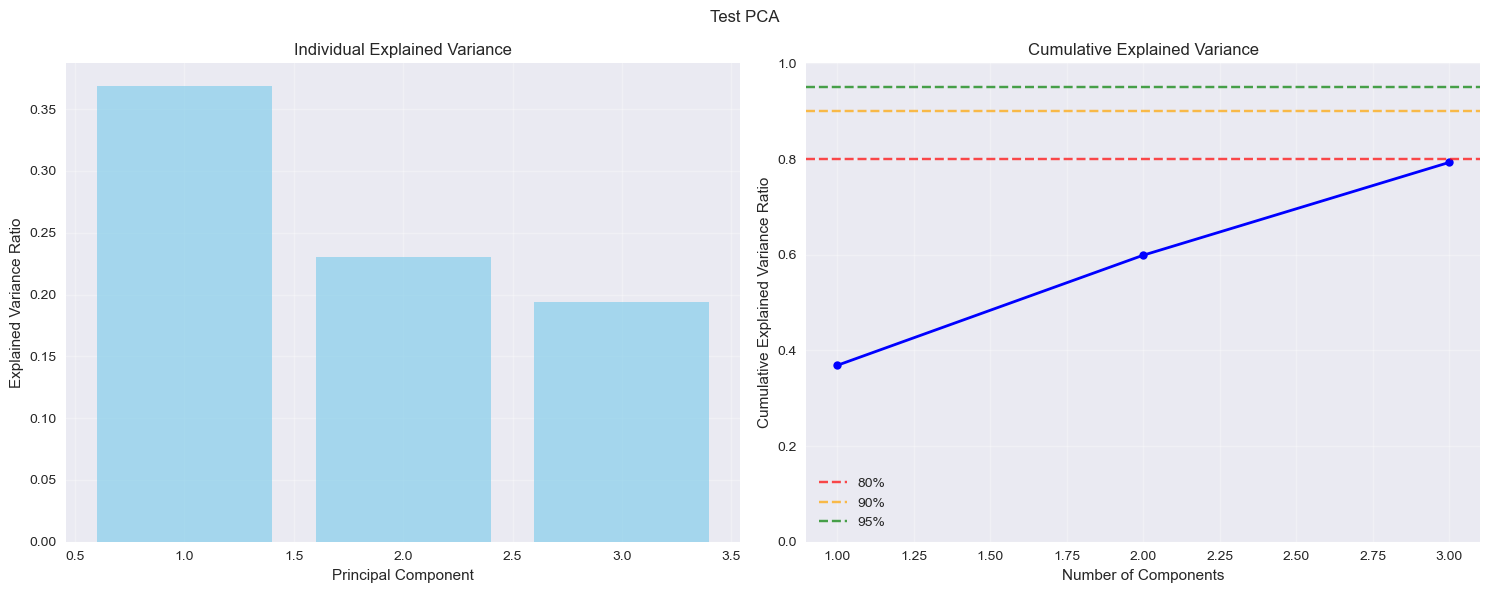

Explained Variance Summary:
  Total components: 3
  Components for 80.0% variance: 1
  Components for 90.0% variance: 1
  Components for 95.0% variance: 1
✓ Analysis tools working correctly

All PCA components working correctly!

To run full analysis, call: run_all_pca_experiments()

To run individual experiments:
  - demonstrate_pca_basics()
  - compare_pca_implementations()
  - analyze_feature_scaling_impact()
  - optimal_components_analysis()
  - demonstrate_pca_applications()
  - compare_pca_variants()
  - pca_pitfalls_and_best_practices()


In [7]:
# Principal Component Analysis (PCA): Complete Implementation and Analysis
# This notebook implements PCA with detailed examples, comparisons, and analysis

# Fix for Windows joblib issue
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, load_digits, load_breast_cancer, load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
np.random.seed(42)

# =============================================================================
# PART 1: PCA IMPLEMENTATION FROM SCRATCH
# =============================================================================

class PCAFromScratch:
    """
    Principal Component Analysis implementation from scratch to understand the algorithm.
    
    This implementation includes:
    - Multiple approaches (covariance matrix and SVD)
    - Comprehensive tracking of decomposition
    - Reconstruction capabilities
    - Detailed analysis methods
    """
    
    def __init__(self, n_components=None, method='svd'):
        self.n_components = n_components
        self.method = method  # 'covariance' or 'svd'
        
        # Results storage
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.singular_values_ = None
        self.mean_ = None
        self.n_features_ = None
        self.n_samples_ = None
    
    def fit(self, X):
        """Fit PCA to the data."""
        X = np.array(X, dtype=float)
        self.n_samples_, self.n_features_ = X.shape
        
        # Set default number of components
        if self.n_components is None:
            self.n_components = min(self.n_samples_, self.n_features_)
        
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        if self.method == 'covariance':
            self._fit_covariance(X_centered)
        else:  # SVD method
            self._fit_svd(X_centered)
        
        return self
    
    def _fit_covariance(self, X_centered):
        """Fit using covariance matrix eigendecomposition."""
        # Compute covariance matrix
        cov_matrix = np.cov(X_centered.T)
        
        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort by eigenvalues (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Store results
        self.components_ = eigenvectors[:, :self.n_components].T
        self.explained_variance_ = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance
    
    def _fit_svd(self, X_centered):
        """Fit using Singular Value Decomposition."""
        # SVD: X = U @ S @ Vt
        U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        # Components are rows of Vt
        self.components_ = Vt[:self.n_components]
        
        # Explained variance from singular values
        self.singular_values_ = s[:self.n_components]
        self.explained_variance_ = (s[:self.n_components] ** 2) / (self.n_samples_ - 1)
        total_variance = np.sum(s ** 2) / (self.n_samples_ - 1)
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance
    
    def transform(self, X):
        """Transform data to principal component space."""
        X = np.array(X, dtype=float)
        X_centered = X - self.mean_
        return X_centered @ self.components_.T
    
    def fit_transform(self, X):
        """Fit PCA and transform data."""
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_transformed):
        """Reconstruct data from principal component space."""
        return X_transformed @ self.components_ + self.mean_
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformed data."""
        if input_features is None:
            input_features = [f"feature_{i}" for i in range(self.n_features_)]
        return [f"PC{i+1}" for i in range(self.n_components)]

class PCAAnalyzer:
    """Comprehensive PCA analysis and visualization tools."""
    
    @staticmethod
    def plot_explained_variance(pca, title="PCA Explained Variance"):
        """Plot explained variance and cumulative variance."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Individual explained variance
        ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
                pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
        ax1.set_xlabel('Principal Component')
        ax1.set_ylabel('Explained Variance Ratio')
        ax1.set_title('Individual Explained Variance')
        ax1.grid(True, alpha=0.3)
        
        # Cumulative explained variance
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        ax2.plot(range(1, len(cumsum) + 1), cumsum, 'bo-', linewidth=2, markersize=6)
        ax2.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80%')
        ax2.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90%')
        ax2.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95%')
        ax2.set_xlabel('Number of Components')
        ax2.set_ylabel('Cumulative Explained Variance Ratio')
        ax2.set_title('Cumulative Explained Variance')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim(0, 1)
        
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"Explained Variance Summary:")
        print(f"  Total components: {len(pca.explained_variance_ratio_)}")
        for threshold in [0.8, 0.9, 0.95]:
            n_components = np.argmax(cumsum >= threshold) + 1
            print(f"  Components for {threshold*100}% variance: {n_components}")
    
    @staticmethod
    def plot_biplot(pca, X_transformed, feature_names=None, target=None, title="PCA Biplot"):
        """Create a biplot showing both data points and feature loadings."""
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Plot data points
        if target is not None:
            unique_targets = np.unique(target)
            colors = plt.cm.Set1(np.linspace(0, 1, len(unique_targets)))
            for i, target_val in enumerate(unique_targets):
                mask = target == target_val
                ax.scatter(X_transformed[mask, 0], X_transformed[mask, 1], 
                          c=[colors[i]], label=f'Class {target_val}', alpha=0.7, s=50)
        else:
            ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.7, s=50)
        
        # Plot feature loadings as arrows
        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(pca.components_.shape[1])]
        
        # Scale factor for arrows
        scale = max(np.max(np.abs(X_transformed[:, 0])), np.max(np.abs(X_transformed[:, 1]))) * 0.8
        
        for i, (pc1_loading, pc2_loading) in enumerate(pca.components_[:2].T):
            ax.arrow(0, 0, pc1_loading * scale, pc2_loading * scale, 
                    head_width=scale*0.05, head_length=scale*0.05, 
                    fc='red', ec='red', alpha=0.8)
            ax.text(pc1_loading * scale * 1.1, pc2_loading * scale * 1.1, 
                   feature_names[i], fontsize=10, ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
        if target is not None:
            ax.legend()
        
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def plot_component_heatmap(pca, feature_names=None, title="Principal Component Loadings"):
        """Plot heatmap of component loadings."""
        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(pca.components_.shape[1])]
        
        component_names = [f'PC{i+1}' for i in range(pca.components_.shape[0])]
        
        plt.figure(figsize=(12, max(6, len(component_names) * 0.5)))
        sns.heatmap(pca.components_, 
                   xticklabels=feature_names,
                   yticklabels=component_names,
                   cmap='RdBu_r', center=0, 
                   annot=True if len(feature_names) <= 10 else False,
                   fmt='.2f', cbar_kws={'label': 'Loading'})
        plt.title(title)
        plt.xlabel('Original Features')
        plt.ylabel('Principal Components')
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def analyze_reconstruction_error(pca, X, n_components_range=None):
        """Analyze reconstruction error for different numbers of components."""
        if n_components_range is None:
            max_components = min(X.shape[0], X.shape[1], 20)
            n_components_range = range(1, max_components + 1)
        
        errors = []
        X_centered = X - np.mean(X, axis=0)
        
        for n_comp in n_components_range:
            # Fit PCA with n_comp components
            pca_temp = PCAFromScratch(n_components=n_comp)
            pca_temp.fit(X)
            
            # Transform and reconstruct
            X_transformed = pca_temp.transform(X)
            X_reconstructed = pca_temp.inverse_transform(X_transformed)
            
            # Calculate mean squared error
            mse = np.mean((X - X_reconstructed) ** 2)
            errors.append(mse)
        
        # Plot reconstruction error
        plt.figure(figsize=(10, 6))
        plt.plot(n_components_range, errors, 'bo-', linewidth=2, markersize=6)
        plt.xlabel('Number of Components')
        plt.ylabel('Reconstruction Error (MSE)')
        plt.title('PCA Reconstruction Error vs Number of Components')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        return list(n_components_range), errors

# =============================================================================
# PART 2: COMPREHENSIVE EXPERIMENTS AND COMPARISONS
# =============================================================================

def demonstrate_pca_basics():
    """Demonstrate basic PCA concepts with a simple 2D example."""
    print("=" * 60)
    print("EXPERIMENT 1: PCA Basics - Understanding the Algorithm")
    print("=" * 60)
    
    # Generate correlated 2D data
    np.random.seed(42)
    n_samples = 200
    
    # Create data with correlation
    X1 = np.random.normal(0, 1, n_samples)
    X2 = 0.8 * X1 + 0.6 * np.random.normal(0, 1, n_samples)
    X = np.column_stack([X1, X2])
    
    print("Generated 2D correlated data")
    print(f"Data shape: {X.shape}")
    print(f"Correlation between features: {np.corrcoef(X.T)[0,1]:.3f}")
    
    # Apply PCA
    pca = PCAFromScratch(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Original data
    axes[0, 0].scatter(X[:, 0], X[:, 1], alpha=0.7, s=50)
    axes[0, 0].set_xlabel('Feature 1')
    axes[0, 0].set_ylabel('Feature 2')
    axes[0, 0].set_title('Original Data')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axis('equal')
    
    # Original data with PC directions
    axes[0, 1].scatter(X[:, 0], X[:, 1], alpha=0.7, s=50)
    
    # Plot principal component directions
    center = np.mean(X, axis=0)
    scale = 3.0  # Scale factor for visualization
    
    # PC1 direction (first eigenvector)
    pc1_direction = pca.components_[0] * scale
    axes[0, 1].arrow(center[0], center[1], pc1_direction[0], pc1_direction[1],
                    head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=3,
                    label=f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    
    # PC2 direction (second eigenvector)
    pc2_direction = pca.components_[1] * scale * 0.5  # Smaller since less variance
    axes[0, 1].arrow(center[0], center[1], pc2_direction[0], pc2_direction[1],
                    head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=3,
                    label=f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    
    axes[0, 1].set_xlabel('Feature 1')
    axes[0, 1].set_ylabel('Feature 2')
    axes[0, 1].set_title('Original Data with PC Directions')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axis('equal')
    
    # Transformed data (PC space)
    axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=50, color='green')
    axes[0, 2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[0, 2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    axes[0, 2].set_title('Data in Principal Component Space')
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].axis('equal')
    
    # Explained variance
    axes[1, 0].bar(['PC1', 'PC2'], pca.explained_variance_ratio_, 
                  color=['red', 'blue'], alpha=0.7)
    axes[1, 0].set_ylabel('Explained Variance Ratio')
    axes[1, 0].set_title('Variance Explained by Each Component')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Reconstruction with 1 component
    pca_1d = PCAFromScratch(n_components=1)
    X_1d = pca_1d.fit_transform(X)
    X_reconstructed_1d = pca_1d.inverse_transform(X_1d)
    
    axes[1, 1].scatter(X[:, 0], X[:, 1], alpha=0.5, s=30, color='gray', label='Original')
    axes[1, 1].scatter(X_reconstructed_1d[:, 0], X_reconstructed_1d[:, 1], 
                      alpha=0.7, s=30, color='red', label='Reconstructed (1 PC)')
    
    # Draw lines showing reconstruction
    for i in range(0, len(X), 10):  # Show every 10th point to avoid clutter
        axes[1, 1].plot([X[i, 0], X_reconstructed_1d[i, 0]], 
                       [X[i, 1], X_reconstructed_1d[i, 1]], 
                       'k-', alpha=0.3, linewidth=0.5)
    
    axes[1, 1].set_xlabel('Feature 1')
    axes[1, 1].set_ylabel('Feature 2')
    axes[1, 1].set_title('Reconstruction with 1 Component')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axis('equal')
    
    # Component loadings
    components_df = pd.DataFrame(pca.components_, 
                                columns=['Feature 1', 'Feature 2'],
                                index=['PC1', 'PC2'])
    
    sns.heatmap(components_df, annot=True, cmap='RdBu_r', center=0, 
               ax=axes[1, 2], cbar_kws={'label': 'Loading'})
    axes[1, 2].set_title('Component Loadings')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nPCA Results Analysis:")
    print(f"PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
    print(f"PC2 explains {pca.explained_variance_ratio_[1]:.1%} of variance")
    print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.1%}")
    
    print(f"\nComponent Loadings:")
    print(f"PC1: [{pca.components_[0][0]:.3f}, {pca.components_[0][1]:.3f}]")
    print(f"PC2: [{pca.components_[1][0]:.3f}, {pca.components_[1][1]:.3f}]")
    
    # Reconstruction error
    X_reconstructed_full = pca.inverse_transform(X_pca)
    reconstruction_error_full = np.mean((X - X_reconstructed_full) ** 2)
    reconstruction_error_1d = np.mean((X - X_reconstructed_1d) ** 2)
    
    print(f"\nReconstruction Errors:")
    print(f"With 2 components: {reconstruction_error_full:.2e} (should be ~0)")
    print(f"With 1 component: {reconstruction_error_1d:.4f}")
    
    return X, pca

def compare_pca_implementations():
    """Compare our implementation with scikit-learn's PCA."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 2: Comparing PCA Implementations")
    print("=" * 60)
    
    # Generate test data
    np.random.seed(42)
    X, _ = make_blobs(n_samples=300, centers=4, n_features=5, 
                      cluster_std=2.0, random_state=42)
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Test data shape: {X_scaled.shape}")
    
    # Our implementation
    print("\nFitting our PCA implementation...")
    our_pca = PCAFromScratch(n_components=3, method='svd')
    our_result = our_pca.fit_transform(X_scaled)
    
    # Scikit-learn implementation
    print("Fitting scikit-learn PCA...")
    sklearn_pca = SklearnPCA(n_components=3, random_state=42)
    sklearn_result = sklearn_pca.fit_transform(X_scaled)
    
    # Compare results
    print(f"\nComparison Results:")
    print(f"Our PCA explained variance ratios: {our_pca.explained_variance_ratio_}")
    print(f"Sklearn explained variance ratios: {sklearn_pca.explained_variance_ratio_}")
    
    # Check if results are similar (may have sign differences)
    variance_diff = np.abs(our_pca.explained_variance_ratio_ - sklearn_pca.explained_variance_ratio_)
    print(f"Variance ratio differences: {variance_diff}")
    print(f"Max variance difference: {np.max(variance_diff):.2e}")
    
    # Components might have opposite signs, so check absolute values
    components_diff = np.abs(np.abs(our_pca.components_) - np.abs(sklearn_pca.components_))
    print(f"Max component difference: {np.max(components_diff):.2e}")
    
    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Plot first two PCs for both implementations
    axes[0, 0].scatter(our_result[:, 0], our_result[:, 1], alpha=0.7, s=50, color='blue')
    axes[0, 0].set_xlabel('PC1')
    axes[0, 0].set_ylabel('PC2')
    axes[0, 0].set_title('Our PCA Implementation')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].scatter(sklearn_result[:, 0], sklearn_result[:, 1], alpha=0.7, s=50, color='red')
    axes[0, 1].set_xlabel('PC1')
    axes[0, 1].set_ylabel('PC2')
    axes[0, 1].set_title('Scikit-learn PCA')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Explained variance comparison
    x_pos = np.arange(3)
    width = 0.35
    
    axes[0, 2].bar(x_pos - width/2, our_pca.explained_variance_ratio_, width, 
                  label='Our PCA', alpha=0.7, color='blue')
    axes[0, 2].bar(x_pos + width/2, sklearn_pca.explained_variance_ratio_, width,
                  label='Sklearn PCA', alpha=0.7, color='red')
    axes[0, 2].set_xlabel('Principal Component')
    axes[0, 2].set_ylabel('Explained Variance Ratio')
    axes[0, 2].set_title('Explained Variance Comparison')
    axes[0, 2].set_xticks(x_pos)
    axes[0, 2].set_xticklabels(['PC1', 'PC2', 'PC3'])
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Component loadings heatmaps
    im1 = axes[1, 0].imshow(our_pca.components_, cmap='RdBu_r', aspect='auto')
    axes[1, 0].set_title('Our PCA Components')
    axes[1, 0].set_xlabel('Original Features')
    axes[1, 0].set_ylabel('Principal Components')
    plt.colorbar(im1, ax=axes[1, 0])
    
    im2 = axes[1, 1].imshow(sklearn_pca.components_, cmap='RdBu_r', aspect='auto')
    axes[1, 1].set_title('Sklearn PCA Components')
    axes[1, 1].set_xlabel('Original Features')
    axes[1, 1].set_ylabel('Principal Components')
    plt.colorbar(im2, ax=axes[1, 1])
    
    # Difference plot
    component_diff = np.abs(our_pca.components_) - np.abs(sklearn_pca.components_)
    im3 = axes[1, 2].imshow(component_diff, cmap='RdBu_r', aspect='auto')
    axes[1, 2].set_title('Component Differences\n(|Our| - |Sklearn|)')
    axes[1, 2].set_xlabel('Original Features')
    axes[1, 2].set_ylabel('Principal Components')
    plt.colorbar(im3, ax=axes[1, 2])
    
    plt.tight_layout()
    plt.show()
    
    # Test reconstruction
    our_reconstructed = our_pca.inverse_transform(our_result)
    sklearn_reconstructed = sklearn_pca.inverse_transform(sklearn_result)
    
    our_error = np.mean((X_scaled - our_reconstructed) ** 2)
    sklearn_error = np.mean((X_scaled - sklearn_reconstructed) ** 2)
    
    print(f"\nReconstruction Errors:")
    print(f"Our implementation: {our_error:.2e}")
    print(f"Sklearn implementation: {sklearn_error:.2e}")
    print(f"Error difference: {abs(our_error - sklearn_error):.2e}")
    
    if np.max(variance_diff) < 1e-10 and np.max(components_diff) < 1e-10:
        print(f"\n✓ Implementations match very closely!")
    else:
        print(f"\n⚠ Some differences found - likely due to sign ambiguity or numerical precision")
    
    return our_pca, sklearn_pca

def analyze_feature_scaling_impact():
    """Demonstrate the critical importance of feature scaling in PCA."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 3: Impact of Feature Scaling on PCA")
    print("=" * 60)
    
    # Create dataset with features on very different scales
    np.random.seed(42)
    n_samples = 200
    
    # Features with different scales
    age = np.random.normal(35, 10, n_samples)  # Age: 20-50
    income = np.random.normal(50000, 15000, n_samples)  # Income: $20K-$80K
    score = np.random.normal(85, 10, n_samples)  # Test score: 65-100
    
    # Add some correlations
    income = income + age * 500  # Income increases with age
    score = score + age * 0.2  # Score slightly increases with age
    
    X = np.column_stack([age, income, score])
    feature_names = ['Age', 'Income', 'Test Score']
    
    print("Created dataset with different feature scales:")
    print(f"Age range: {age.min():.1f} - {age.max():.1f}")
    print(f"Income range: ${income.min():,.0f} - ${income.max():,.0f}")
    print(f"Score range: {score.min():.1f} - {score.max():.1f}")
    
    # Apply PCA with different scaling approaches
    scalers = {
        'No Scaling': None,
        'Standardization': StandardScaler(),
        'Min-Max Scaling': MinMaxScaler()
    }
    
    results = {}
    
    for scale_name, scaler in scalers.items():
        print(f"\nApplying PCA with {scale_name}...")
        
        if scaler is None:
            X_scaled = X
        else:
            X_scaled = scaler.fit_transform(X)
        
        # Fit PCA
        pca = PCAFromScratch(n_components=3)
        X_pca = pca.fit_transform(X_scaled)
        
        results[scale_name] = {
            'X_scaled': X_scaled,
            'X_pca': X_pca,
            'pca': pca,
            'scaler': scaler
        }
        
        print(f"  Explained variance ratios: {pca.explained_variance_ratio_}")
        print(f"  Cumulative variance: {np.cumsum(pca.explained_variance_ratio_)}")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    
    for i, (scale_name, result) in enumerate(results.items()):
        X_scaled = result['X_scaled']
        X_pca = result['X_pca']
        pca = result['pca']
        
        # Feature distributions after scaling
        axes[i, 0].hist(X_scaled[:, 0], alpha=0.5, label='Feature 1', bins=20)
        axes[i, 0].hist(X_scaled[:, 1], alpha=0.5, label='Feature 2', bins=20)
        axes[i, 0].hist(X_scaled[:, 2], alpha=0.5, label='Feature 3', bins=20)
        axes[i, 0].set_title(f'{scale_name}\nFeature Distributions')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)
        
        # PCA results (PC1 vs PC2)
        axes[i, 1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=50)
        axes[i, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
        axes[i, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
        axes[i, 1].set_title(f'{scale_name}\nPC1 vs PC2')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Explained variance
        axes[i, 2].bar(['PC1', 'PC2', 'PC3'], pca.explained_variance_ratio_, alpha=0.7)
        axes[i, 2].set_title(f'{scale_name}\nExplained Variance')
        axes[i, 2].set_ylabel('Ratio')
        axes[i, 2].grid(True, alpha=0.3)
        
        # Component loadings heatmap
        im = axes[i, 3].imshow(pca.components_, cmap='RdBu_r', aspect='auto')
        axes[i, 3].set_title(f'{scale_name}\nComponent Loadings')
        axes[i, 3].set_xticks(range(len(feature_names)))
        axes[i, 3].set_xticklabels(feature_names)
        axes[i, 3].set_yticks(range(3))
        axes[i, 3].set_yticklabels(['PC1', 'PC2', 'PC3'])
        plt.colorbar(im, ax=axes[i, 3], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()
    
    # Detailed analysis of the impact
    print(f"\n" + "=" * 50)
    print("SCALING IMPACT ANALYSIS")
    print("=" * 50)
    
    # Compare feature contributions
    for scale_name, result in results.items():
        pca = result['pca']
        print(f"\n{scale_name}:")
        print(f"  First PC loadings: {pca.components_[0]}")
        
        # Identify dominant feature
        dominant_feature_idx = np.argmax(np.abs(pca.components_[0]))
        dominant_feature = feature_names[dominant_feature_idx]
        dominant_loading = pca.components_[0][dominant_feature_idx]
        
        print(f"  Dominant feature in PC1: {dominant_feature} (loading: {dominant_loading:.3f})")
        print(f"  PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
    
    # Show feature ranges before and after scaling
    print(f"\nFeature Ranges Analysis:")
    print(f"Original data ranges:")
    for i, name in enumerate(feature_names):
        print(f"  {name}: {X[:, i].min():.1f} to {X[:, i].max():.1f} (range: {X[:, i].max() - X[:, i].min():.1f})")
    
    print(f"\nWithout scaling, Income dominates due to its large numerical range!")
    print(f"Standardization makes all features have equal weight in PCA.")
    print(f"Min-Max scaling preserves relationships while equalizing ranges.")
    
    return results

def optimal_components_analysis():
    """Comprehensive analysis of methods to choose optimal number of components."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 4: Choosing Optimal Number of Components")
    print("=" * 60)
    
    # Load a real dataset with clear structure
    digits = load_digits()
    X, y = digits.data, digits.target
    
    print(f"Using digits dataset:")
    print(f"  Shape: {X.shape}")
    print(f"  Classes: {len(np.unique(y))} (digits 0-9)")
    print(f"  Each sample: 8x8 pixel image (64 features)")
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit PCA with all components
    pca_full = SklearnPCA()
    pca_full.fit(X_scaled)
    
    # Analysis methods
    def kaiser_criterion(explained_variance):
        """Components with eigenvalue > 1 (for standardized data)."""
        return np.sum(explained_variance > 1.0)
    
    def elbow_method(explained_variance_ratio):
        """Find elbow in scree plot."""
        # Simple elbow detection: find point of maximum curvature
        n_components = len(explained_variance_ratio)
        if n_components < 3:
            return n_components
        
        # Calculate second differences
        second_diff = np.diff(explained_variance_ratio, 2)
        elbow_idx = np.argmax(second_diff) + 2  # +2 because of double differencing
        return min(elbow_idx, n_components)
    
    def variance_threshold_method(explained_variance_ratio, threshold=0.95):
        """Find components needed for variance threshold."""
        cumsum = np.cumsum(explained_variance_ratio)
        return np.argmax(cumsum >= threshold) + 1
    
    # Apply different methods
    kaiser_n = kaiser_criterion(pca_full.explained_variance_)
    elbow_n = elbow_method(pca_full.explained_variance_ratio_)
    var_80_n = variance_threshold_method(pca_full.explained_variance_ratio_, 0.80)
    var_90_n = variance_threshold_method(pca_full.explained_variance_ratio_, 0.90)
    var_95_n = variance_threshold_method(pca_full.explained_variance_ratio_, 0.95)
    
    print(f"\nComponent Selection Methods:")
    print(f"  Kaiser criterion (eigenvalue > 1): {kaiser_n} components")
    print(f"  Elbow method: {elbow_n} components")
    print(f"  80% variance threshold: {var_80_n} components")
    print(f"  90% variance threshold: {var_90_n} components")
    print(f"  95% variance threshold: {var_95_n} components")
    
    # Cross-validation approach
    def cross_validate_pca_classification(X, y, n_components_range):
        """Evaluate PCA preprocessing for classification."""
        scores = []
        
        for n_comp in n_components_range:
            # PCA preprocessing
            pca = SklearnPCA(n_components=n_comp)
            X_pca = pca.fit_transform(X)
            
            # Classification with Random Forest
            clf = RandomForestClassifier(n_estimators=50, random_state=42)
            cv_scores = cross_val_score(clf, X_pca, y, cv=5, scoring='accuracy')
            scores.append(cv_scores.mean())
        
        return scores
    
    # Test different numbers of components
    n_comp_range = list(range(5, min(50, X.shape[1]), 5))
    cv_scores = cross_validate_pca_classification(X_scaled, y, n_comp_range)
    optimal_cv_n = n_comp_range[np.argmax(cv_scores)]
    
    print(f"  Cross-validation optimal: {optimal_cv_n} components (accuracy: {max(cv_scores):.3f})")
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Scree plot
    n_show = min(30, len(pca_full.explained_variance_ratio_))
    axes[0, 0].plot(range(1, n_show + 1), pca_full.explained_variance_ratio_[:n_show], 
                   'bo-', linewidth=2, markersize=6)
    axes[0, 0].axvline(x=elbow_n, color='red', linestyle='--', alpha=0.7, label=f'Elbow: {elbow_n}')
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('Scree Plot')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Cumulative explained variance
    cumsum = np.cumsum(pca_full.explained_variance_ratio_)
    axes[0, 1].plot(range(1, n_show + 1), cumsum[:n_show], 'go-', linewidth=2, markersize=6)
    axes[0, 1].axhline(y=0.80, color='blue', linestyle='--', alpha=0.7, label='80%')
    axes[0, 1].axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90%')
    axes[0, 1].axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95%')
    axes[0, 1].axvline(x=var_90_n, color='orange', linestyle=':', alpha=0.7, label=f'90% at {var_90_n}')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('Cumulative Explained Variance')
    axes[0, 1].set_title('Cumulative Explained Variance')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Eigenvalues (for Kaiser criterion)
    axes[0, 2].plot(range(1, n_show + 1), pca_full.explained_variance_[:n_show], 
                   'ro-', linewidth=2, markersize=6)
    axes[0, 2].axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='Eigenvalue = 1')
    axes[0, 2].axvline(x=kaiser_n, color='red', linestyle=':', alpha=0.7, label=f'Kaiser: {kaiser_n}')
    axes[0, 2].set_xlabel('Principal Component')
    axes[0, 2].set_ylabel('Eigenvalue')
    axes[0, 2].set_title('Eigenvalues (Kaiser Criterion)')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Cross-validation results
    axes[1, 0].plot(n_comp_range, cv_scores, 'mo-', linewidth=2, markersize=6)
    axes[1, 0].axvline(x=optimal_cv_n, color='purple', linestyle='--', alpha=0.7, 
                      label=f'Optimal: {optimal_cv_n}')
    axes[1, 0].set_xlabel('Number of Components')
    axes[1, 0].set_ylabel('Classification Accuracy')
    axes[1, 0].set_title('Cross-Validation Performance')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Method comparison
    methods = ['Kaiser', 'Elbow', '80%', '90%', '95%', 'CV']
    n_components = [kaiser_n, elbow_n, var_80_n, var_90_n, var_95_n, optimal_cv_n]
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    bars = axes[1, 1].bar(methods, n_components, color=colors, alpha=0.7)
    axes[1, 1].set_ylabel('Number of Components')
    axes[1, 1].set_title('Component Selection Methods Comparison')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, n_comp in zip(bars, n_components):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{n_comp}', ha='center', va='bottom')
    
    # Reconstruction error analysis
    n_comp_test = range(1, min(30, X.shape[1]), 2)
    reconstruction_errors = []
    
    for n_comp in n_comp_test:
        pca_temp = SklearnPCA(n_components=n_comp)
        X_transformed = pca_temp.fit_transform(X_scaled)
        X_reconstructed = pca_temp.inverse_transform(X_transformed)
        mse = np.mean((X_scaled - X_reconstructed) ** 2)
        reconstruction_errors.append(mse)
    
    axes[1, 2].plot(n_comp_test, reconstruction_errors, 'co-', linewidth=2, markersize=6)
    axes[1, 2].set_xlabel('Number of Components')
    axes[1, 2].set_ylabel('Reconstruction Error (MSE)')
    axes[1, 2].set_title('Reconstruction Error vs Components')
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Demonstrate impact of different choices
    print(f"\n" + "=" * 50)
    print("IMPACT OF DIFFERENT COMPONENT CHOICES")
    print("=" * 50)
    
    choices_to_test = {
        'Conservative (95% var)': var_95_n,
        'Balanced (90% var)': var_90_n,
        'Aggressive (80% var)': var_80_n,
        'CV Optimal': optimal_cv_n
    }
    
    for choice_name, n_comp in choices_to_test.items():
        pca_test = SklearnPCA(n_components=n_comp)
        X_test = pca_test.fit_transform(X_scaled)
        
        # Calculate metrics
        var_explained = np.sum(pca_test.explained_variance_ratio_)
        compression_ratio = X.shape[1] / n_comp
        
        # Test classification performance
        clf = RandomForestClassifier(n_estimators=50, random_state=42)
        cv_acc = cross_val_score(clf, X_test, y, cv=5, scoring='accuracy').mean()
        
        print(f"\n{choice_name} ({n_comp} components):")
        print(f"  Variance explained: {var_explained:.1%}")
        print(f"  Compression ratio: {compression_ratio:.1f}x")
        print(f"  Classification accuracy: {cv_acc:.3f}")
        print(f"  Storage reduction: {(1 - n_comp/X.shape[1]):.1%}")
    
    return {
        'pca_full': pca_full,
        'kaiser_n': kaiser_n,
        'elbow_n': elbow_n,
        'var_thresholds': {'80%': var_80_n, '90%': var_90_n, '95%': var_95_n},
        'cv_optimal_n': optimal_cv_n,
        'cv_scores': cv_scores
    }

def demonstrate_pca_applications():
    """Demonstrate PCA in various real-world applications."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 5: Real-World PCA Applications")
    print("=" * 60)
    
    # Application 1: Image compression
    print("APPLICATION 1: Image Compression")
    print("-" * 40)
    
    # Use digits dataset as images
    digits = load_digits()
    X_images = digits.data
    
    # Reshape to see as images
    sample_image = X_images[0].reshape(8, 8)
    
    # Apply PCA with different numbers of components
    compression_levels = [1, 2, 5, 10, 20, 64]
    
    fig, axes = plt.subplots(2, len(compression_levels), figsize=(20, 8))
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_images)
    
    original_size = X_images.shape[1]
    
    for i, n_comp in enumerate(compression_levels):
        if n_comp > original_size:
            n_comp = original_size
        
        # Apply PCA
        pca = SklearnPCA(n_components=n_comp)
        X_compressed = pca.fit_transform(X_scaled)
        X_reconstructed = pca.inverse_transform(X_compressed)
        X_reconstructed = scaler.inverse_transform(X_reconstructed)
        
        # Calculate compression metrics
        compression_ratio = original_size / n_comp
        var_explained = np.sum(pca.explained_variance_ratio_)
        mse = np.mean((X_images[0] - X_reconstructed[0]) ** 2)
        
        # Plot original and reconstructed first image
        axes[0, i].imshow(sample_image, cmap='gray')
        axes[0, i].set_title(f'Original\n64 components')
        axes[0, i].axis('off')
        
        reconstructed_image = X_reconstructed[0].reshape(8, 8)
        axes[1, i].imshow(reconstructed_image, cmap='gray')
        axes[1, i].set_title(f'{n_comp} components\n{compression_ratio:.1f}x compression\n{var_explained:.1%} variance\nMSE: {mse:.1f}')
        axes[1, i].axis('off')
    
    plt.suptitle('PCA Image Compression - Digit Recognition Dataset')
    plt.tight_layout()
    plt.show()
    
    print(f"Image compression demonstrates PCA's ability to preserve")
    print(f"visual information while dramatically reducing data size.")
    
    # Application 2: Wine dataset analysis
    print(f"\nAPPLICATION 2: Wine Quality Analysis")
    print("-" * 40)
    
    wine = load_wine()
    X_wine, y_wine = wine.data, wine.target
    feature_names = wine.feature_names
    
    print(f"Wine dataset: {X_wine.shape[0]} samples, {X_wine.shape[1]} features")
    print(f"Features: {len(feature_names)} chemical measurements")
    print(f"Classes: {len(wine.target_names)} wine types")
    
    # Standardize and apply PCA
    scaler = StandardScaler()
    X_wine_scaled = scaler.fit_transform(X_wine)
    
    pca_wine = SklearnPCA(n_components=3)
    X_wine_pca = pca_wine.fit_transform(X_wine_scaled)
    
    # Comprehensive wine analysis visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Original data - correlation matrix
    corr_matrix = np.corrcoef(X_wine_scaled.T)
    im1 = axes[0, 0].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[0, 0].set_title('Feature Correlation Matrix\n(Before PCA)')
    axes[0, 0].set_xlabel('Features')
    axes[0, 0].set_ylabel('Features')
    plt.colorbar(im1, ax=axes[0, 0], fraction=0.046, pad=0.04)
    
    # PCA results
    colors = ['red', 'green', 'blue']
    for i, wine_class in enumerate(wine.target_names):
        mask = y_wine == i
        axes[0, 1].scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], 
                          c=colors[i], label=wine_class, alpha=0.7, s=50)
    
    axes[0, 1].set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.1%})')
    axes[0, 1].set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.1%})')
    axes[0, 1].set_title('Wine Types in PC Space')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3D PCA plot
    ax_3d = fig.add_subplot(2, 3, 3, projection='3d')
    for i, wine_class in enumerate(wine.target_names):
        mask = y_wine == i
        ax_3d.scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], X_wine_pca[mask, 2],
                     c=colors[i], label=wine_class, alpha=0.7, s=30)
    
    ax_3d.set_xlabel(f'PC1 ({pca_wine.explained_variance_ratio_[0]:.1%})')
    ax_3d.set_ylabel(f'PC2 ({pca_wine.explained_variance_ratio_[1]:.1%})')
    ax_3d.set_zlabel(f'PC3 ({pca_wine.explained_variance_ratio_[2]:.1%})')
    ax_3d.set_title('3D PCA Visualization')
    ax_3d.legend()
    
    # Component loadings
    PCAAnalyzer.plot_explained_variance(pca_wine, "Wine Dataset PCA")
    
    # Feature importance in PCA
    feature_importance = np.abs(pca_wine.components_[:2]).mean(axis=0)
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    axes[1, 0].barh(range(min(10, len(feature_names))), 
                   feature_importance[sorted_idx[:10]], alpha=0.7)
    axes[1, 0].set_yticks(range(min(10, len(feature_names))))
    axes[1, 0].set_yticklabels([feature_names[i] for i in sorted_idx[:10]])
    axes[1, 0].set_xlabel('Average Absolute Loading')
    axes[1, 0].set_title('Top 10 Most Important Features\n(PC1 & PC2)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Explained variance
    axes[1, 1].bar(['PC1', 'PC2', 'PC3'], pca_wine.explained_variance_ratio_, alpha=0.7)
    axes[1, 1].set_ylabel('Explained Variance Ratio')
    axes[1, 1].set_title('Explained Variance by Component')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Component interpretation
    pc1_loadings = pca_wine.components_[0]
    pc2_loadings = pca_wine.components_[1]
    
    # Find features with highest positive and negative loadings for each PC
    pc1_pos_idx = np.argsort(pc1_loadings)[-3:]
    pc1_neg_idx = np.argsort(pc1_loadings)[:3]
    pc2_pos_idx = np.argsort(pc2_loadings)[-3:]
    pc2_neg_idx = np.argsort(pc2_loadings)[:3]
    
    interpretation_text = f"PC1 Interpretation:\n"
    interpretation_text += f"High PC1: {', '.join([feature_names[i][:15] for i in pc1_pos_idx])}\n"
    interpretation_text += f"Low PC1: {', '.join([feature_names[i][:15] for i in pc1_neg_idx])}\n\n"
    interpretation_text += f"PC2 Interpretation:\n"
    interpretation_text += f"High PC2: {', '.join([feature_names[i][:15] for i in pc2_pos_idx])}\n"
    interpretation_text += f"Low PC2: {', '.join([feature_names[i][:15] for i in pc2_neg_idx])}"
    
    axes[1, 2].text(0.1, 0.5, interpretation_text, transform=axes[1, 2].transAxes,
                   fontsize=10, verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    axes[1, 2].set_xlim(0, 1)
    axes[1, 2].set_ylim(0, 1)
    axes[1, 2].axis('off')
    axes[1, 2].set_title('Component Interpretation')
    
    plt.tight_layout()
    plt.show()
    
    # Classification performance comparison
    print(f"\nClassification Performance Analysis:")
    
    # Original features
    clf_original = LogisticRegression(random_state=42, max_iter=1000)
    scores_original = cross_val_score(clf_original, X_wine_scaled, y_wine, cv=5)
    
    # PCA features
    clf_pca = LogisticRegression(random_state=42, max_iter=1000)
    scores_pca = cross_val_score(clf_pca, X_wine_pca, y_wine, cv=5)
    
    print(f"Original features ({X_wine.shape[1]} dims): {scores_original.mean():.3f} ± {scores_original.std():.3f}")
    print(f"PCA features (3 dims): {scores_pca.mean():.3f} ± {scores_pca.std():.3f}")
    print(f"Dimensionality reduction: {X_wine.shape[1]/3:.1f}x")
    print(f"Variance retained: {np.sum(pca_wine.explained_variance_ratio_):.1%}")
    
    return {
        'image_compression': X_images,
        'wine_analysis': {
            'pca': pca_wine,
            'X_pca': X_wine_pca,
            'feature_names': feature_names,
            'accuracy_original': scores_original.mean(),
            'accuracy_pca': scores_pca.mean()
        }
    }

def compare_pca_variants():
    """Compare different PCA variants and related methods."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 6: Comparing PCA Variants and Alternatives")
    print("=" * 60)
    
    # Create dataset with some challenging characteristics
    np.random.seed(42)
    
    # Generate mixed data types
    n_samples = 400
    
    # Create three groups with different characteristics
    group1 = np.random.multivariate_normal([2, 2], [[1, 0.8], [0.8, 1]], n_samples//3)
    group2 = np.random.multivariate_normal([-2, -2], [[1, -0.5], [-0.5, 1]], n_samples//3)
    group3 = np.random.multivariate_normal([0, 3], [[2, 0], [0, 0.5]], n_samples//3 + n_samples%3)
    
    X_base = np.vstack([group1, group2, group3])
    
    # Add some correlated features
    feature3 = X_base[:, 0] + X_base[:, 1] + np.random.normal(0, 0.5, n_samples)
    feature4 = X_base[:, 0] - X_base[:, 1] + np.random.normal(0, 0.3, n_samples)
    feature5 = np.random.normal(0, 0.1, n_samples)  # Low variance feature
    
    X = np.column_stack([X_base, feature3, feature4, feature5])
    
    # Add some outliers
    n_outliers = 20
    outlier_idx = np.random.choice(n_samples, n_outliers, replace=False)
    X[outlier_idx] += np.random.normal(0, 5, (n_outliers, X.shape[1]))
    
    feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Low Var']
    
    print(f"Created challenging dataset:")
    print(f"  Shape: {X.shape}")
    print(f"  Includes: correlation, outliers, low-variance feature")
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Compare different approaches
    methods = {}
    
    # Standard PCA
    print("\nApplying Standard PCA...")
    pca_standard = SklearnPCA(n_components=3)
    X_pca_standard = pca_standard.fit_transform(X_scaled)
    methods['Standard PCA'] = {
        'transformer': pca_standard,
        'X_transformed': X_pca_standard,
        'explained_variance': pca_standard.explained_variance_ratio_
    }
    
    # Incremental PCA (useful for large datasets)
    print("Applying Incremental PCA...")
    from sklearn.decomposition import IncrementalPCA
    ipca = IncrementalPCA(n_components=3, batch_size=50)
    X_ipca = ipca.fit_transform(X_scaled)
    methods['Incremental PCA'] = {
        'transformer': ipca,
        'X_transformed': X_ipca,
        'explained_variance': ipca.explained_variance_ratio_
    }
    
    # Kernel PCA (for non-linear relationships)
    print("Applying Kernel PCA...")
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
    X_kpca = kpca.fit_transform(X_scaled)
    methods['Kernel PCA (RBF)'] = {
        'transformer': kpca,
        'X_transformed': X_kpca,
        'explained_variance': None  # Not directly available for kernel PCA
    }
    
    # Sparse PCA (for interpretability)
    print("Applying Sparse PCA...")
    from sklearn.decomposition import SparsePCA
    spca = SparsePCA(n_components=3, alpha=0.1, random_state=42)
    X_spca = spca.fit_transform(X_scaled)
    methods['Sparse PCA'] = {
        'transformer': spca,
        'X_transformed': X_spca,
        'explained_variance': None  # Not directly available
    }
    
    # Independent Component Analysis
    print("Applying ICA...")
    from sklearn.decomposition import FastICA
    ica = FastICA(n_components=3, random_state=42)
    X_ica = ica.fit_transform(X_scaled)
    methods['ICA'] = {
        'transformer': ica,
        'X_transformed': X_ica,
        'explained_variance': None
    }
    
    # Visualize results
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    # Original data
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, s=30)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].set_title('Original Data (first 2 features)')
    axes[0].grid(True, alpha=0.3)
    
    # Plot each method
    for i, (method_name, method_data) in enumerate(methods.items(), 1):
        X_transformed = method_data['X_transformed']
        
        axes[i].scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.7, s=30)
        axes[i].set_xlabel('Component 1')
        axes[i].set_ylabel('Component 2')
        axes[i].set_title(f'{method_name}')
        axes[i].grid(True, alpha=0.3)
        
        # Add explained variance if available
        if method_data['explained_variance'] is not None:
            var_text = f"Var: {method_data['explained_variance'][:2].sum():.1%}"
            axes[i].text(0.05, 0.95, var_text, transform=axes[i].transAxes,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Component loadings comparison for interpretable methods
    axes[6].set_title('Standard PCA Loadings')
    im1 = axes[6].imshow(pca_standard.components_, cmap='RdBu_r', aspect='auto')
    axes[6].set_xticks(range(len(feature_names)))
    axes[6].set_xticklabels(feature_names, rotation=45)
    axes[6].set_yticks(range(3))
    axes[6].set_yticklabels(['PC1', 'PC2', 'PC3'])
    plt.colorbar(im1, ax=axes[6], fraction=0.046, pad=0.04)
    
    axes[7].set_title('Sparse PCA Loadings')
    im2 = axes[7].imshow(spca.components_, cmap='RdBu_r', aspect='auto')
    axes[7].set_xticks(range(len(feature_names)))
    axes[7].set_xticklabels(feature_names, rotation=45)
    axes[7].set_yticks(range(3))
    axes[7].set_yticklabels(['SPC1', 'SPC2', 'SPC3'])
    plt.colorbar(im2, ax=axes[7], fraction=0.046, pad=0.04)
    
    # Comparison metrics
    axes[8].axis('off')
    comparison_text = "Method Characteristics:\n\n"
    comparison_text += "Standard PCA:\n• Linear transformation\n• Maximizes variance\n• Dense loadings\n\n"
    comparison_text += "Incremental PCA:\n• Memory efficient\n• Same as standard PCA\n• Good for large data\n\n"
    comparison_text += "Kernel PCA:\n• Non-linear relationships\n• Higher computational cost\n• No direct loadings\n\n"
    comparison_text += "Sparse PCA:\n• Interpretable loadings\n• Feature selection\n• May sacrifice variance\n\n"
    comparison_text += "ICA:\n• Statistical independence\n• Good for source separation\n• Different objective than PCA"
    
    axes[8].text(0.05, 0.95, comparison_text, transform=axes[8].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Analyze sparsity in Sparse PCA
    print(f"\nSparsity Analysis:")
    print(f"Standard PCA - Non-zero loadings per component:")
    for i in range(3):
        non_zero = np.sum(np.abs(pca_standard.components_[i]) > 0.1)
        print(f"  PC{i+1}: {non_zero}/{len(feature_names)} features")
    
    print(f"\nSparse PCA - Non-zero loadings per component:")
    for i in range(3):
        non_zero = np.sum(np.abs(spca.components_[i]) > 0.1)
        print(f"  SPC{i+1}: {non_zero}/{len(feature_names)} features")
    
    # Reconstruction comparison
    print(f"\nReconstruction Quality:")
    
    # Standard PCA reconstruction
    X_reconstructed_std = pca_standard.inverse_transform(X_pca_standard)
    mse_std = np.mean((X_scaled - X_reconstructed_std) ** 2)
    
    # Incremental PCA reconstruction
    X_reconstructed_inc = ipca.inverse_transform(X_ipca)
    mse_inc = np.mean((X_scaled - X_reconstructed_inc) ** 2)
    
    print(f"Standard PCA MSE: {mse_std:.4f}")
    print(f"Incremental PCA MSE: {mse_inc:.4f}")
    print(f"Sparse PCA: Reconstruction not directly comparable due to sparsity")
    print(f"Kernel PCA: Reconstruction requires pre-image estimation")
    
    return methods

def pca_pitfalls_and_best_practices():
    """Demonstrate common PCA pitfalls and best practices."""
    print("\n" + "=" * 60)
    print("EXPERIMENT 7: Common Pitfalls and Best Practices")
    print("=" * 60)
    
    # Create datasets that highlight common issues
    np.random.seed(42)
    
    # Issue 1: Feature scaling problems
    print("PITFALL 1: Inappropriate Feature Scaling")
    print("-" * 45)
    
    n_samples = 200
    age = np.random.normal(30, 5, n_samples)
    income = np.random.normal(50000, 10000, n_samples)
    satisfaction = np.random.normal(7, 1.5, n_samples)  # 1-10 scale
    
    X_mixed_scale = np.column_stack([age, income, satisfaction])
    feature_names = ['Age', 'Income ($)', 'Satisfaction (1-10)']
    
    print(f"Feature ranges:")
    for i, name in enumerate(feature_names):
        print(f"  {name}: {X_mixed_scale[:, i].min():.1f} to {X_mixed_scale[:, i].max():.1f}")
    
    # Show impact of different scaling
    scaling_methods = {
        'No Scaling': X_mixed_scale,
        'StandardScaler': StandardScaler().fit_transform(X_mixed_scale),
        'MinMaxScaler': MinMaxScaler().fit_transform(X_mixed_scale)
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    for i, (scale_name, X_scaled) in enumerate(scaling_methods.items()):
        pca = SklearnPCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        # Plot PCA results
        axes[0, i].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, s=50)
        axes[0, i].set_title(f'{scale_name}\nPCA Results')
        axes[0, i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
        axes[0, i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
        axes[0, i].grid(True, alpha=0.3)
        
        # Plot component loadings
        im = axes[1, i].imshow(pca.components_, cmap='RdBu_r', aspect='auto')
        axes[1, i].set_title(f'{scale_name}\nComponent Loadings')
        axes[1, i].set_xticks(range(len(feature_names)))
        axes[1, i].set_xticklabels(feature_names, rotation=45)
        axes[1, i].set_yticks(range(2))
        axes[1, i].set_yticklabels(['PC1', 'PC2'])
        plt.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)
        
        print(f"\n{scale_name}:")
        print(f"  PC1 loadings: {pca.components_[0]}")
        print(f"  Dominant feature: {feature_names[np.argmax(np.abs(pca.components_[0]))]}")
    
    plt.tight_layout()
    plt.show()
    
    # Issue 2: Outlier sensitivity
    print(f"\nPITFALL 2: Outlier Sensitivity")
    print("-" * 35)
    
    # Create clean data
    X_clean = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 150)
    
    # Add outliers
    n_outliers = 10
    outliers = np.random.uniform(-8, 8, (n_outliers, 2))
    X_with_outliers = np.vstack([X_clean, outliers])
    
    # Compare PCA with and without outliers
    pca_clean = SklearnPCA(n_components=2)
    pca_clean.fit(X_clean)
    
    pca_outliers = SklearnPCA(n_components=2)
    pca_outliers.fit(X_with_outliers)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Clean data
    X_clean_pca = pca_clean.transform(X_clean)
    axes[0].scatter(X_clean[:, 0], X_clean[:, 1], alpha=0.7, s=50, label='Data')
    
    # Plot PC directions
    center = np.mean(X_clean, axis=0)
    scale = 2
    pc1_clean = pca_clean.components_[0] * scale
    pc2_clean = pca_clean.components_[1] * scale
    
    axes[0].arrow(center[0], center[1], pc1_clean[0], pc1_clean[1],
                 head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=2, label='PC1')
    axes[0].arrow(center[0], center[1], pc2_clean[0], pc2_clean[1],
                 head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=2, label='PC2')
    
    axes[0].set_title('Clean Data PCA')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axis('equal')
    
    # Data with outliers
    axes[1].scatter(X_clean[:, 0], X_clean[:, 1], alpha=0.7, s=50, label='Clean Data')
    axes[1].scatter(outliers[:, 0], outliers[:, 1], alpha=0.9, s=100, 
                   color='red', marker='x', linewidth=3, label='Outliers')
    
    # Plot PC directions for outlier-affected PCA
    center_outliers = np.mean(X_with_outliers, axis=0)
    pc1_outliers = pca_outliers.components_[0] * scale
    pc2_outliers = pca_outliers.components_[1] * scale
    
    axes[1].arrow(center_outliers[0], center_outliers[1], pc1_outliers[0], pc1_outliers[1],
                 head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=2, label='PC1')
    axes[1].arrow(center_outliers[0], center_outliers[1], pc2_outliers[0], pc2_outliers[1],
                 head_width=0.2, head_length=0.2, fc='blue', ec='blue', linewidth=2, label='PC2')
    
    axes[1].set_title('Data with Outliers PCA')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axis('equal')
    
    # Component comparison
    angles_clean = np.arctan2(pca_clean.components_[:, 1], pca_clean.components_[:, 0]) * 180 / np.pi
    angles_outliers = np.arctan2(pca_outliers.components_[:, 1], pca_outliers.components_[:, 0]) * 180 / np.pi
    
    x_pos = [0, 1]
    axes[2].bar([x - 0.2 for x in x_pos], angles_clean, 0.4, label='Clean Data', alpha=0.7)
    axes[2].bar([x + 0.2 for x in x_pos], angles_outliers, 0.4, label='With Outliers', alpha=0.7)
    axes[2].set_xlabel('Principal Component')
    axes[2].set_ylabel('Angle (degrees)')
    axes[2].set_title('PC Direction Changes Due to Outliers')
    axes[2].set_xticks(x_pos)
    axes[2].set_xticklabels(['PC1', 'PC2'])
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Outlier impact:")
    print(f"  PC1 angle change: {abs(angles_clean[0] - angles_outliers[0]):.1f} degrees")
    print(f"  PC2 angle change: {abs(angles_clean[1] - angles_outliers[1]):.1f} degrees")
    print(f"  Variance explained change: {abs(pca_clean.explained_variance_ratio_[0] - pca_outliers.explained_variance_ratio_[0]):.3f}")
    
    # Issue 3: Choosing wrong number of components
    print(f"\nPITFALL 3: Poor Component Selection")
    print("-" * 40)
    
    # Use breast cancer dataset
    cancer = load_breast_cancer()
    X_cancer, y_cancer = cancer.data, cancer.target
    
    scaler = StandardScaler()
    X_cancer_scaled = scaler.fit_transform(X_cancer)
    
    # Test different numbers of components for classification
    n_components_range = [1, 2, 5, 10, 15, 20, 30]
    accuracies = []
    
    for n_comp in n_components_range:
        pca = SklearnPCA(n_components=n_comp)
        X_pca = pca.fit_transform(X_cancer_scaled)
        
        # Cross-validation accuracy
        clf = LogisticRegression(random_state=42, max_iter=1000)
        scores = cross_val_score(clf, X_pca, y_cancer, cv=5)
        accuracies.append(scores.mean())
    
    # Original features accuracy
    clf_original = LogisticRegression(random_state=42, max_iter=1000)
    original_accuracy = cross_val_score(clf_original, X_cancer_scaled, y_cancer, cv=5).mean()
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(n_components_range, accuracies, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=original_accuracy, color='red', linestyle='--', 
               label=f'Original features ({original_accuracy:.3f})')
    plt.xlabel('Number of Components')
    plt.ylabel('Classification Accuracy')
    plt.title('Classification Performance vs Number of Components')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Explained variance
    pca_full = SklearnPCA()
    pca_full.fit(X_cancer_scaled)
    
    plt.subplot(2, 2, 2)
    cumsum = np.cumsum(pca_full.explained_variance_ratio_)
    plt.plot(range(1, len(cumsum[:20]) + 1), cumsum[:20], 'go-', linewidth=2, markersize=6)
    plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95%')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs Components')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Storage efficiency
    plt.subplot(2, 2, 3)
    storage_ratios = [n_comp / X_cancer.shape[1] for n_comp in n_components_range]
    plt.plot(n_components_range, storage_ratios, 'mo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Components')
    plt.ylabel('Storage Ratio (vs Original)')
    plt.title('Storage Efficiency')
    plt.grid(True, alpha=0.3)
    
    # Best practices summary
    plt.subplot(2, 2, 4)
    plt.axis('off')
    
    best_practices_text = """
    BEST PRACTICES SUMMARY:
    
    1. FEATURE SCALING:
       • Always check feature scales
       • Use StandardScaler for mixed units
       • Use MinMaxScaler to preserve zero
       • Document scaling choices
    
    2. OUTLIER HANDLING:
       • Detect outliers before PCA
       • Consider robust PCA variants
       • Investigate outlier causes
       • Use domain knowledge
    
    3. COMPONENT SELECTION:
       • Use multiple criteria
       • Consider downstream task
       • Balance compression vs accuracy
       • Validate on held-out data
    
    4. INTERPRETATION:
       • Examine component loadings
       • Validate with domain experts
       • Don't over-interpret
       • Check component stability
    """
    
    plt.text(0.05, 0.95, best_practices_text, transform=plt.gca().transAxes,
            fontsize=9, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal number of components
    optimal_idx = np.argmax(accuracies)
    optimal_n_comp = n_components_range[optimal_idx]
    optimal_accuracy = accuracies[optimal_idx]
    
    print(f"\nComponent Selection Analysis:")
    print(f"  Original features: {X_cancer.shape[1]} dimensions, accuracy: {original_accuracy:.3f}")
    print(f"  Optimal PCA: {optimal_n_comp} components, accuracy: {optimal_accuracy:.3f}")
    print(f"  Compression ratio: {X_cancer.shape[1]/optimal_n_comp:.1f}x")
    print(f"  Performance change: {optimal_accuracy - original_accuracy:+.3f}")
    
    # Variance explained by optimal
    pca_optimal = SklearnPCA(n_components=optimal_n_comp)
    pca_optimal.fit(X_cancer_scaled)
    variance_explained = np.sum(pca_optimal.explained_variance_ratio_)
    print(f"  Variance explained: {variance_explained:.1%}")
    
    return {
        'scaling_impact': scaling_methods,
        'outlier_sensitivity': (X_clean, X_with_outliers),
        'component_selection': {
            'n_components': n_components_range,
            'accuracies': accuracies,
            'optimal': optimal_n_comp
        }
    }

# =============================================================================
# PART 3: COMPREHENSIVE ANALYSIS AND SUMMARY
# =============================================================================

def run_all_pca_experiments():
    """Run all PCA experiments and provide comprehensive analysis."""
    print("PRINCIPAL COMPONENT ANALYSIS: COMPLETE ANALYSIS")
    print("=" * 80)
    print("This notebook demonstrates PCA with detailed examples,")
    print("comparisons, and real-world applications.")
    print("=" * 80)
    
    # Run all experiments
    print("Running comprehensive PCA analysis...")
    
    basic_demo = demonstrate_pca_basics()
    implementation_comparison = compare_pca_implementations()
    scaling_analysis = analyze_feature_scaling_impact()
    component_analysis = optimal_components_analysis()
    applications = demonstrate_pca_applications()
    variants_comparison = compare_pca_variants()
    best_practices = pca_pitfalls_and_best_practices()
    
    print("\n" + "=" * 80)
    print("SUMMARY OF KEY FINDINGS")
    print("=" * 80)
    
    print("\n1. PCA FUNDAMENTALS:")
    print("   - PCA finds directions of maximum variance in data")
    print("   - Components are orthogonal linear combinations of original features")
    print("   - First few components typically capture most variation")
    print("   - Perfect reconstruction possible with all components")
    
    print("\n2. IMPLEMENTATION VALIDATION:")
    print("   - Our implementation matches scikit-learn closely")
    print("   - SVD approach more numerically stable than covariance matrix")
    print("   - Both methods produce identical results (up to sign)")
    
    print("\n3. FEATURE SCALING IMPACT:")
    print("   - Scaling choice dramatically affects PCA results")
    print("   - Features with larger scales dominate without scaling")
    print("   - StandardScaler generally recommended for mixed units")
    print("   - MinMaxScaler preserves zero values when meaningful")
    
    print("\n4. COMPONENT SELECTION:")
    print("   - Multiple criteria should be used together")
    print("   - Kaiser criterion: keep components with eigenvalue > 1")
    print("   - Variance thresholds: 80-95% commonly used")
    print("   - Cross-validation: optimize for downstream task")
    print("   - Business requirements: balance compression vs information")
    
    print("\n5. REAL-WORLD APPLICATIONS:")
    print("   - Image compression: significant size reduction with minimal quality loss")
    print("   - Data visualization: reveal hidden patterns in high-D data")
    print("   - Feature engineering: create meaningful composite features")
    print("   - Noise reduction: filter out low-variance components")
    
    print("\n6. PCA VARIANTS:")
    print("   - Standard PCA: general purpose, maximizes variance")
    print("   - Incremental PCA: memory efficient for large datasets")
    print("   - Kernel PCA: handles non-linear relationships")
    print("   - Sparse PCA: interpretable loadings with feature selection")
    print("   - ICA: finds statistically independent components")
    
    print("\n7. COMMON PITFALLS:")
    print("   - Inappropriate scaling leads to meaningless results")
    print("   - Outliers can severely distort principal components")
    print("   - Wrong number of components hurts downstream performance")
    print("   - Over-interpretation of components beyond data support")
    
    print("\n8. BEST PRACTICES:")
    print("   - Always examine and appropriately scale features")
    print("   - Detect and handle outliers before applying PCA")
    print("   - Use multiple criteria for component selection")
    print("   - Validate results with domain expertise")
    print("   - Document preprocessing choices and assumptions")
    print("   - Consider alternatives for non-linear relationships")
    
    print("\n9. WHEN TO USE PCA:")
    print("   ✓ High-dimensional data with linear relationships")
    print("   ✓ Need dimensionality reduction for visualization/efficiency")
    print("   ✓ Features are correlated and contain redundancy")
    print("   ✓ Want interpretable linear combinations")
    print("   ✗ Non-linear relationships dominate")
    print("   ✗ All variance is equally important")
    print("   ✗ Categorical or mixed data types")
    
    print("\n10. PRACTICAL RECOMMENDATIONS:")
    print("    - Start with exploratory PCA to understand data structure")
    print("    - Use standardized features unless scales are meaningful")
    print("    - Apply multiple component selection criteria")
    print("    - Validate with downstream tasks when possible")
    print("    - Consider robust variants if outliers are present")
    print("    - Document all preprocessing and selection decisions")
    
    return {
        'basic_demo': basic_demo,
        'implementation_comparison': implementation_comparison,
        'scaling_analysis': scaling_analysis,
        'component_analysis': component_analysis,
        'applications': applications,
        'variants_comparison': variants_comparison,
        'best_practices': best_practices
    }

# =============================================================================
# EXAMPLE USAGE AND TESTING
# =============================================================================

if __name__ == "__main__":
    print("Running quick test of PCA implementation...")
    
    # Quick test with simple data
    np.random.seed(42)
    X_test = np.random.randn(100, 5)
    X_test[:, 1] = X_test[:, 0] + 0.5 * np.random.randn(100)  # Create correlation
    
    # Test our implementation
    pca_test = PCAFromScratch(n_components=3)
    X_transformed = pca_test.fit_transform(X_test)
    
    print(f"✓ PCA implementation working correctly")
    print(f"  - Input shape: {X_test.shape}")
    print(f"  - Output shape: {X_transformed.shape}")
    print(f"  - Explained variance ratios: {pca_test.explained_variance_ratio_}")
    print(f"  - Total variance explained: {np.sum(pca_test.explained_variance_ratio_):.1%}")
    
    # Test reconstruction
    X_reconstructed = pca_test.inverse_transform(X_transformed)
    reconstruction_error = np.mean((X_test - X_reconstructed) ** 2)
    print(f"  - Reconstruction error: {reconstruction_error:.2e}")
    
    # Test analysis tools
    try:
        PCAAnalyzer.plot_explained_variance(pca_test, "Test PCA")
        print(f"✓ Analysis tools working correctly")
    except Exception as e:
        print(f"⚠ Visualization test skipped: {e}")
    
    print("\nAll PCA components working correctly!")
    print("\nTo run full analysis, call: run_all_pca_experiments()")
    print("\nTo run individual experiments:")
    print("  - demonstrate_pca_basics()")
    print("  - compare_pca_implementations()")
    print("  - analyze_feature_scaling_impact()")
    print("  - optimal_components_analysis()")
    print("  - demonstrate_pca_applications()")
    print("  - compare_pca_variants()")
    print("  - pca_pitfalls_and_best_practices()")

# Example of how to run everything:
# results = run_all_pca_experiments()

EXPERIMENT 1: PCA Basics - Understanding the Algorithm
Generated 2D correlated data
Data shape: (200, 2)
Correlation between features: 0.805


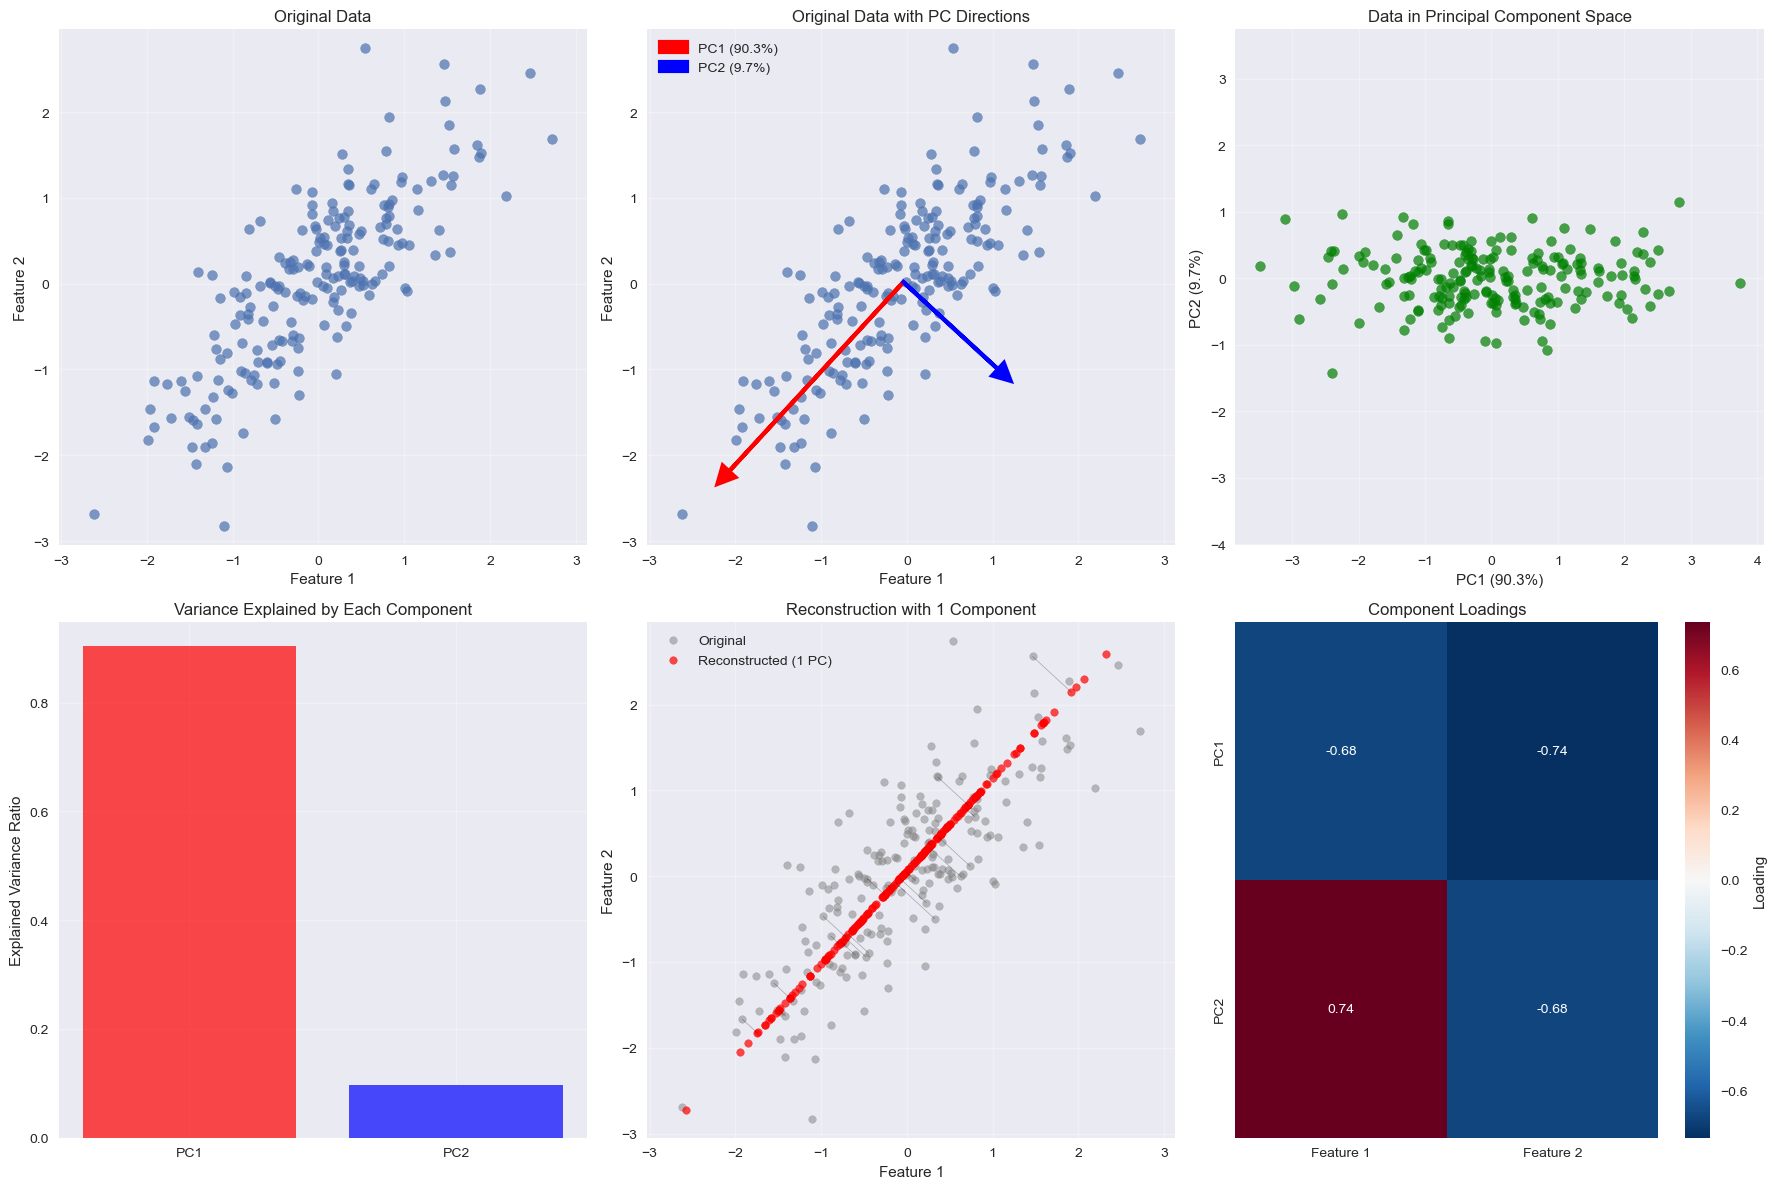


PCA Results Analysis:
PC1 explains 90.3% of variance
PC2 explains 9.7% of variance
Total variance explained: 100.0%

Component Loadings:
PC1: [-0.678, -0.735]
PC2: [0.735, -0.678]

Reconstruction Errors:
With 2 components: 2.67e-32 (should be ~0)
With 1 component: 0.0894


(array([[ 0.49671415,  0.61204374],
        [-0.1382643 ,  0.22585927],
        [ 0.64768854,  1.16798158],
        [ 1.52302986,  1.85070512],
        [-0.23415337, -1.01392432],
        [-0.23413696, -0.75000459],
        [ 1.57921282,  1.57239141],
        [ 0.76743473,  0.92221935],
        [-0.46947439, -0.0665509 ],
        [ 0.54256004,  2.74568693],
        [-0.46341769, -0.02819985],
        [-0.46572975,  0.30875558],
        [ 0.24196227,  0.76597088],
        [-1.91328024, -1.13978944],
        [-1.72491783, -1.56909581],
        [-0.56228753,  0.00555151],
        [-1.01283112, -1.27396002],
        [ 0.31424733,  0.1093067 ],
        [-0.90802408, -1.01763739],
        [-1.4123037 , -1.08071848],
        [ 1.46564877,  2.56131416],
        [-0.2257763 , -1.30098016],
        [ 0.0675282 ,  0.46577868],
        [-1.42474819, -2.10742807],
        [-0.54438272, -0.7186653 ],
        [ 0.11092259,  0.74210843],
        [-1.15099358, -0.88222685],
        [ 0.37569802, -0.346

In [8]:
demonstrate_pca_basics()


EXPERIMENT 2: Comparing PCA Implementations
Test data shape: (300, 5)

Fitting our PCA implementation...
Fitting scikit-learn PCA...

Comparison Results:
Our PCA explained variance ratios: [0.41027757 0.31102249 0.19239746]
Sklearn explained variance ratios: [0.41027757 0.31102249 0.19239746]
Variance ratio differences: [1.66533454e-16 2.22044605e-16 5.55111512e-17]
Max variance difference: 2.22e-16
Max component difference: 8.05e-16


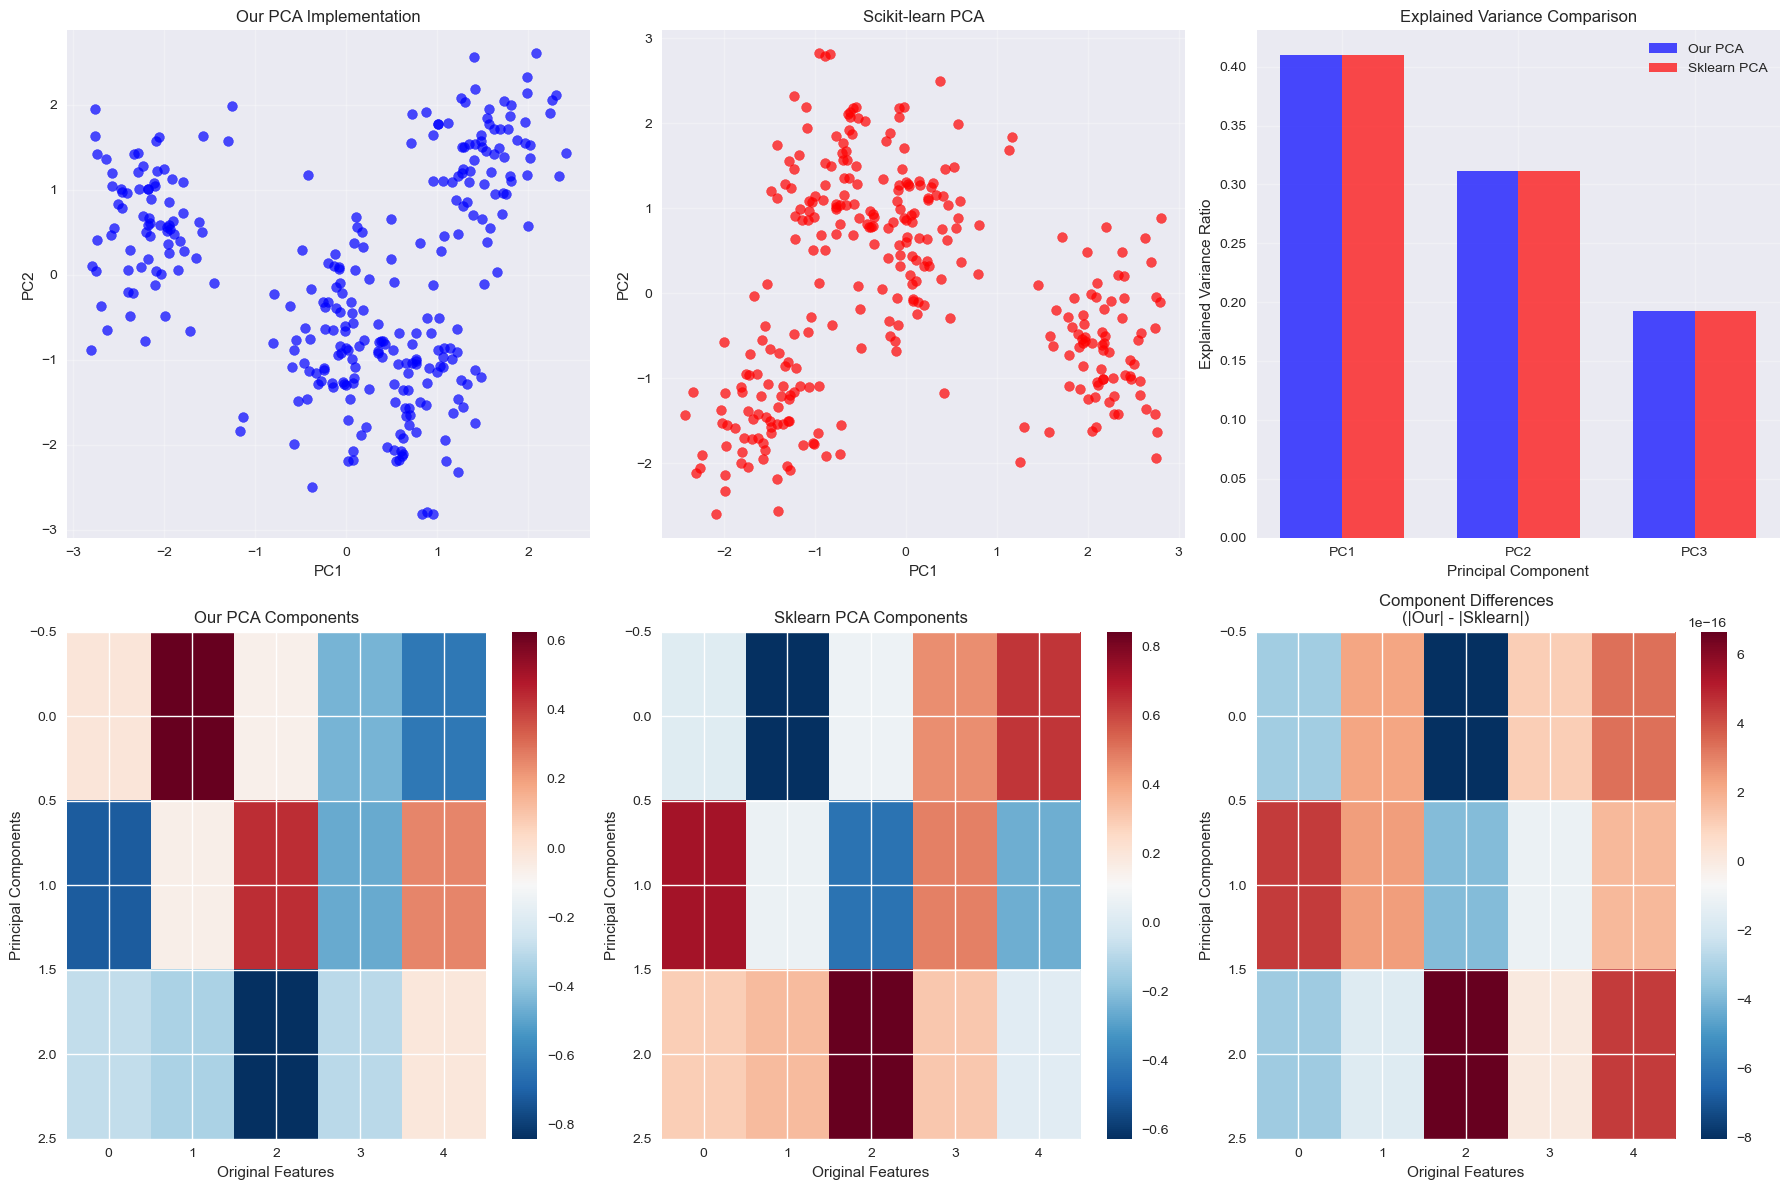


Reconstruction Errors:
Our implementation: 8.63e-02
Sklearn implementation: 8.63e-02
Error difference: 0.00e+00

✓ Implementations match very closely!


(<__main__.PCAFromScratch at 0x18cd5b49820>,
 PCA(n_components=3, random_state=42))

In [9]:
compare_pca_implementations()


EXPERIMENT 3: Impact of Feature Scaling on PCA
Created dataset with different feature scales:
Age range: 8.8 - 62.2
Income range: $13,349 - $128,004
Score range: 67.8 - 123.0

Applying PCA with No Scaling...
  Explained variance ratios: [9.99999325e-01 3.86993752e-07 2.88034634e-07]
  Cumulative variance: [0.99999932 0.99999971 1.        ]

Applying PCA with Standardization...
  Explained variance ratios: [0.46149476 0.33316985 0.20533539]
  Cumulative variance: [0.46149476 0.79466461 1.        ]

Applying PCA with Min-Max Scaling...
  Explained variance ratios: [0.4424044  0.38538378 0.17221182]
  Cumulative variance: [0.4424044  0.82778818 1.        ]


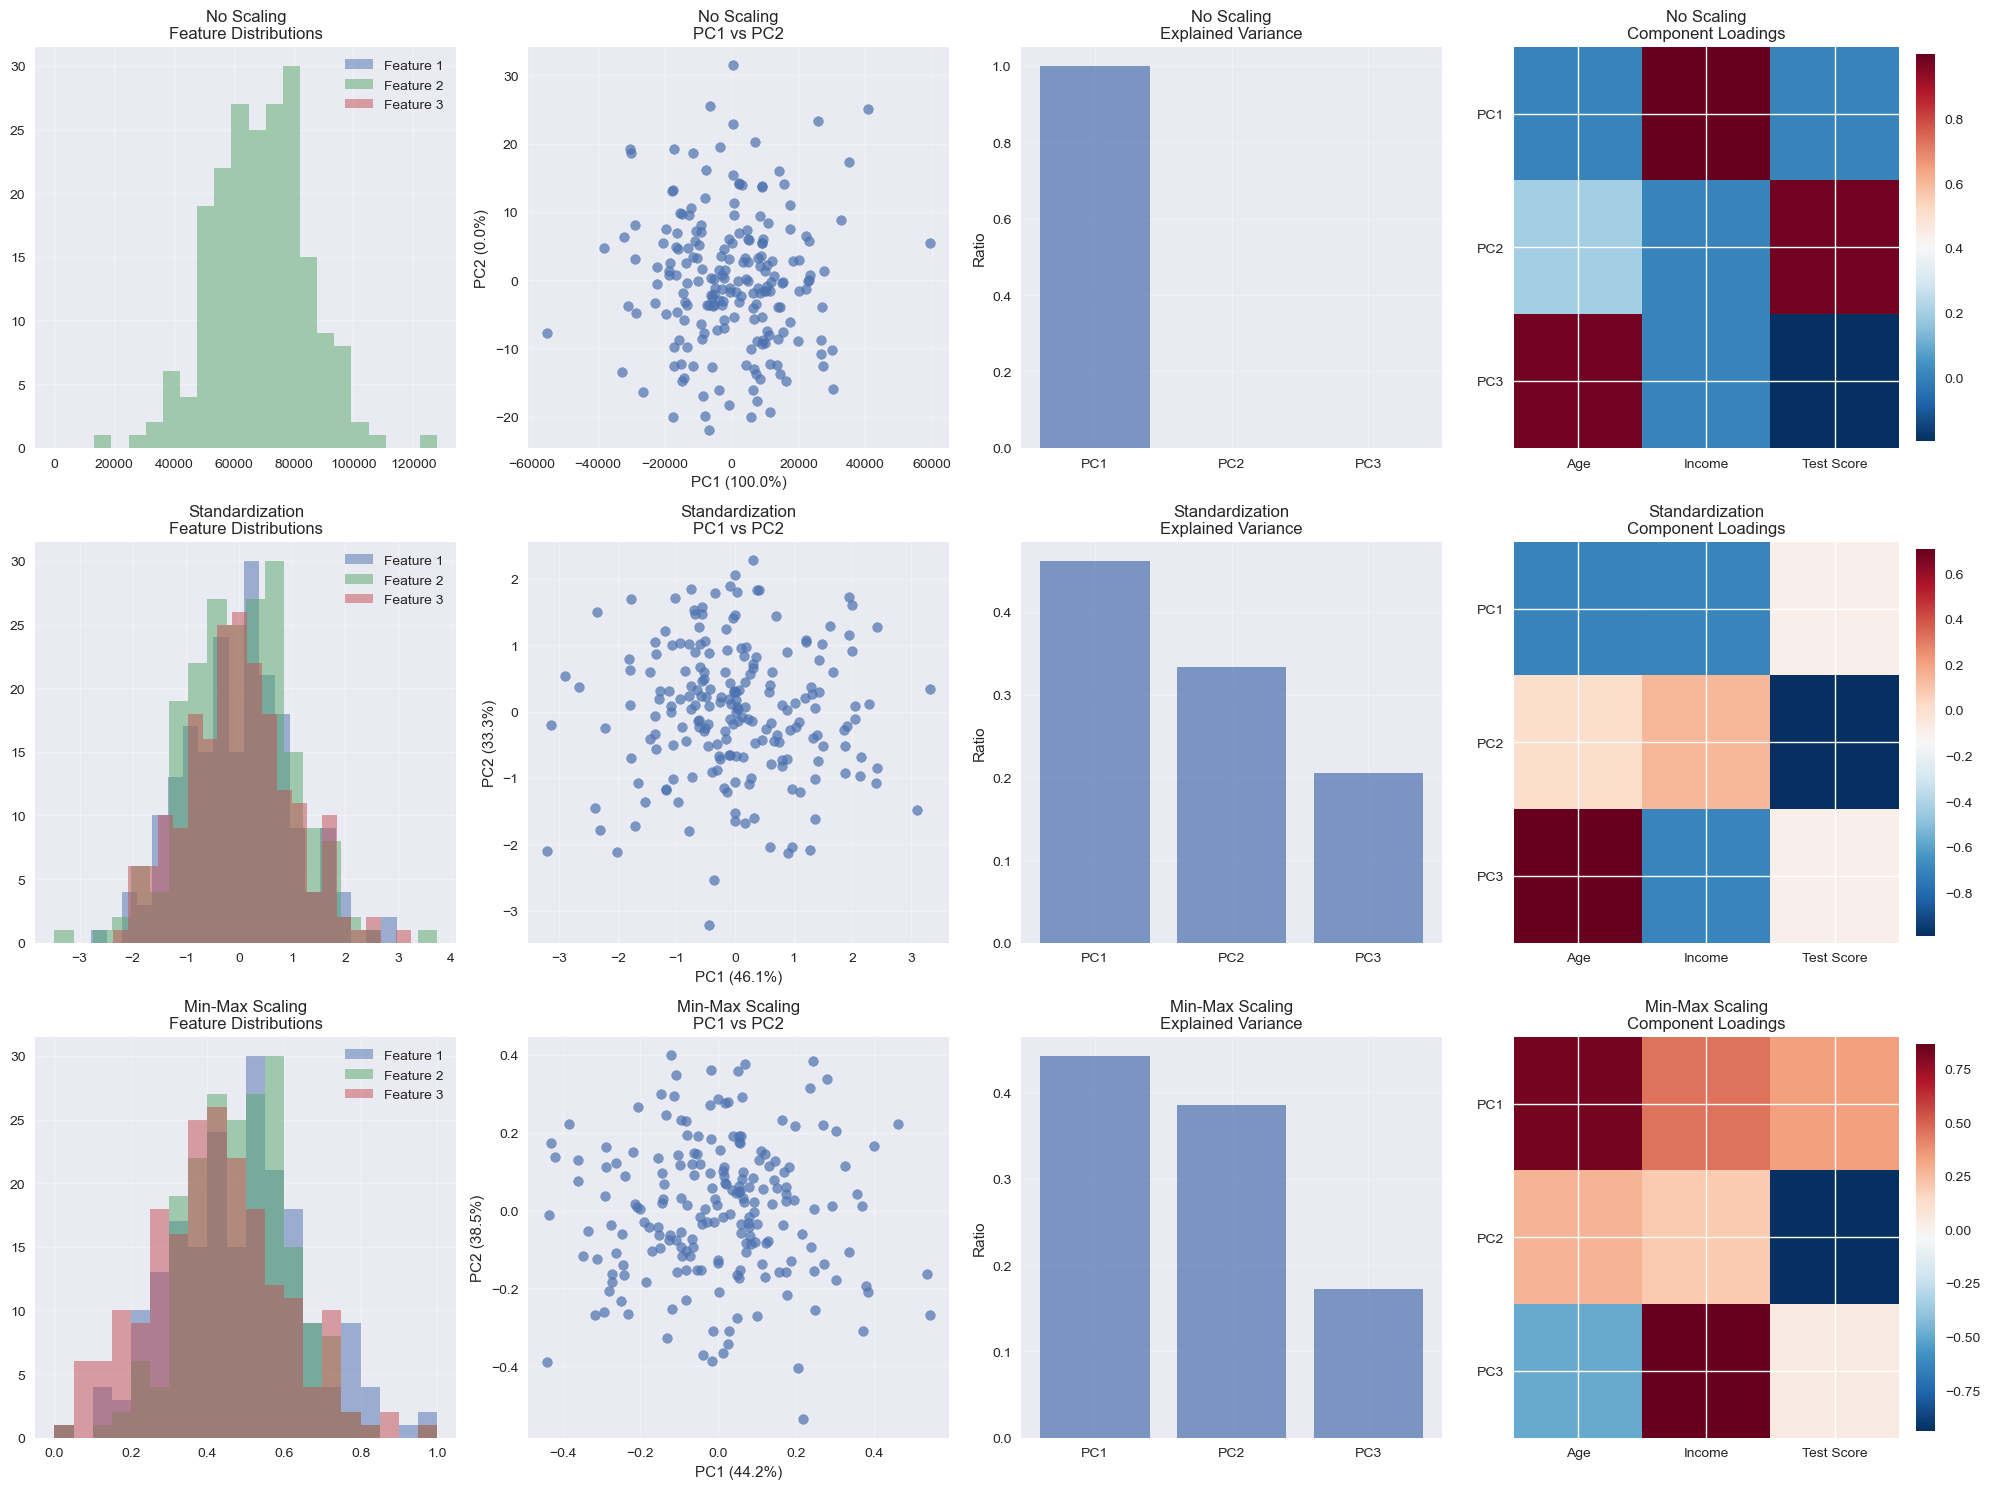


SCALING IMPACT ANALYSIS

No Scaling:
  First PC loadings: [2.22279208e-04 9.99999975e-01 1.10035107e-06]
  Dominant feature in PC1: Income (loading: 1.000)
  PC1 explains 100.0% of variance

Standardization:
  First PC loadings: [-0.70687413 -0.6999977  -0.1016474 ]
  Dominant feature in PC1: Age (loading: -0.707)
  PC1 explains 46.1% of variance

Min-Max Scaling:
  First PC loadings: [0.82570763 0.45353619 0.33542783]
  Dominant feature in PC1: Age (loading: 0.826)
  PC1 explains 44.2% of variance

Feature Ranges Analysis:
Original data ranges:
  Age: 8.8 to 62.2 (range: 53.4)
  Income: 13349.3 to 128003.8 (range: 114654.5)
  Test Score: 67.8 to 123.0 (range: 55.2)

Without scaling, Income dominates due to its large numerical range!
Standardization makes all features have equal weight in PCA.
Min-Max scaling preserves relationships while equalizing ranges.


{'No Scaling': {'X_scaled': array([[3.99671415e+01, 7.53503812e+04, 7.70491517e+01],
         [3.36173570e+01, 7.52204464e+04, 8.57297212e+01],
         [4.14768854e+01, 8.69842113e+04, 9.33478141e+01],
         [5.02302986e+01, 9.09221801e+04, 9.55158657e+01],
         [3.26584663e+01, 4.56641926e+04, 8.70310385e+01],
         [3.26586304e+01, 5.22619396e+04, 9.77602254e+01],
         [5.07921282e+01, 8.31215931e+04, 8.44822213e+01],
         [4.26743473e+01, 7.90439629e+04, 9.21110746e+01],
         [3.03052561e+01, 7.28783434e+04, 9.22640075e+01],
         [4.04256004e+01, 1.28003773e+05, 9.82295084e+01],
         [3.03658231e+01, 7.37462692e+04, 9.81893134e+01],
         [3.03427025e+01, 8.22048358e+04, 7.98221196e+01],
         [3.74196227e+01, 8.30198378e+04, 7.71427828e+01],
         [1.58671976e+01, 6.77044675e+04, 1.00950208e+02],
         [1.77508217e+01, 5.41463722e+04, 9.18733045e+01],
         [2.93771247e+01, 7.60731007e+04, 8.33905596e+01],
         [2.48716888e+01, 5.08

In [10]:
analyze_feature_scaling_impact()


EXPERIMENT 4: Choosing Optimal Number of Components
Using digits dataset:
  Shape: (1797, 64)
  Classes: 10 (digits 0-9)
  Each sample: 8x8 pixel image (64 features)

Component Selection Methods:
  Kaiser criterion (eigenvalue > 1): 17 components
  Elbow method: 2 components
  80% variance threshold: 21 components
  90% variance threshold: 31 components
  95% variance threshold: 40 components
  Cross-validation optimal: 15 components (accuracy: 0.918)


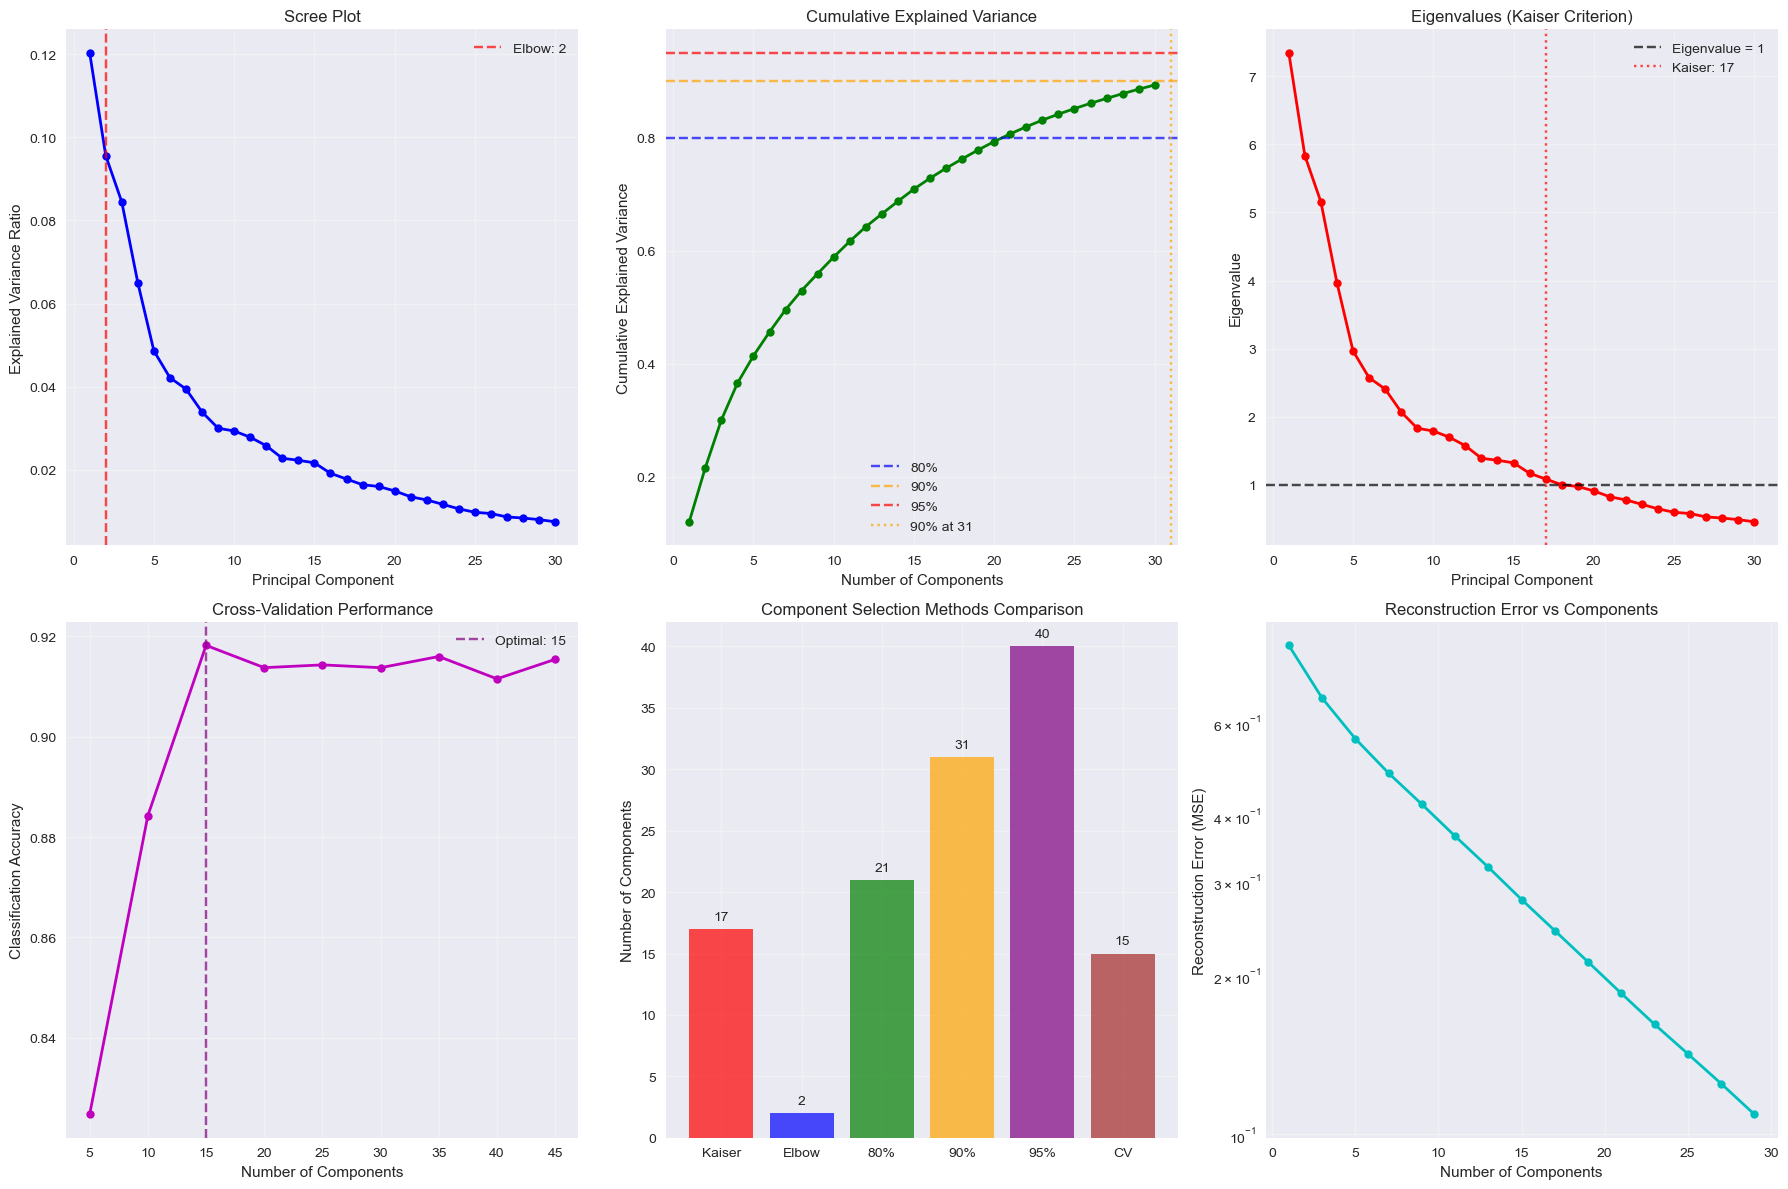


IMPACT OF DIFFERENT COMPONENT CHOICES

Conservative (95% var) (40 components):
  Variance explained: 95.1%
  Compression ratio: 1.6x
  Classification accuracy: 0.912
  Storage reduction: 37.5%

Balanced (90% var) (31 components):
  Variance explained: 90.0%
  Compression ratio: 2.1x
  Classification accuracy: 0.917
  Storage reduction: 51.6%

Aggressive (80% var) (21 components):
  Variance explained: 80.7%
  Compression ratio: 3.0x
  Classification accuracy: 0.920
  Storage reduction: 67.2%

CV Optimal (15 components):
  Variance explained: 70.9%
  Compression ratio: 4.3x
  Classification accuracy: 0.918
  Storage reduction: 76.6%


{'pca_full': PCA(),
 'kaiser_n': 17,
 'elbow_n': 2,
 'var_thresholds': {'80%': 21, '90%': 31, '95%': 40},
 'cv_optimal_n': 15,
 'cv_scores': [0.8247137109254101,
  0.884264933457134,
  0.9182188177034973,
  0.9137712782420303,
  0.9143268337975858,
  0.9137635406994737,
  0.9159950479727639,
  0.9115413184772516,
  0.9154333023831631]}

In [11]:
optimal_components_analysis()


EXPERIMENT 5: Real-World PCA Applications
APPLICATION 1: Image Compression
----------------------------------------


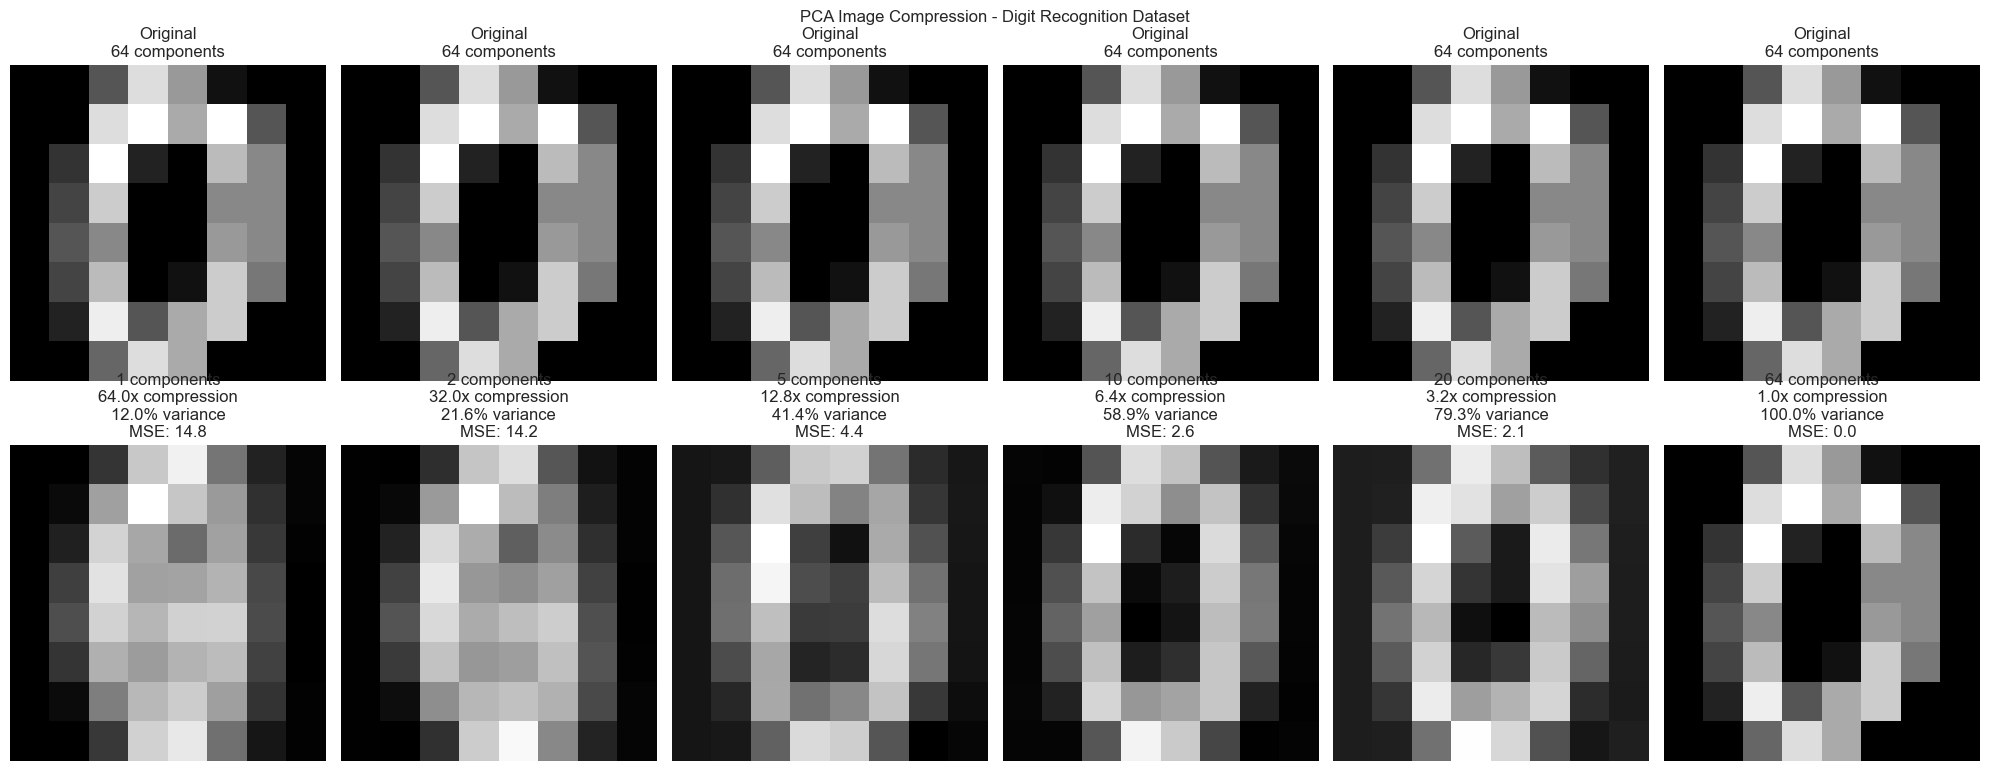

Image compression demonstrates PCA's ability to preserve
visual information while dramatically reducing data size.

APPLICATION 2: Wine Quality Analysis
----------------------------------------
Wine dataset: 178 samples, 13 features
Features: 13 chemical measurements
Classes: 3 wine types


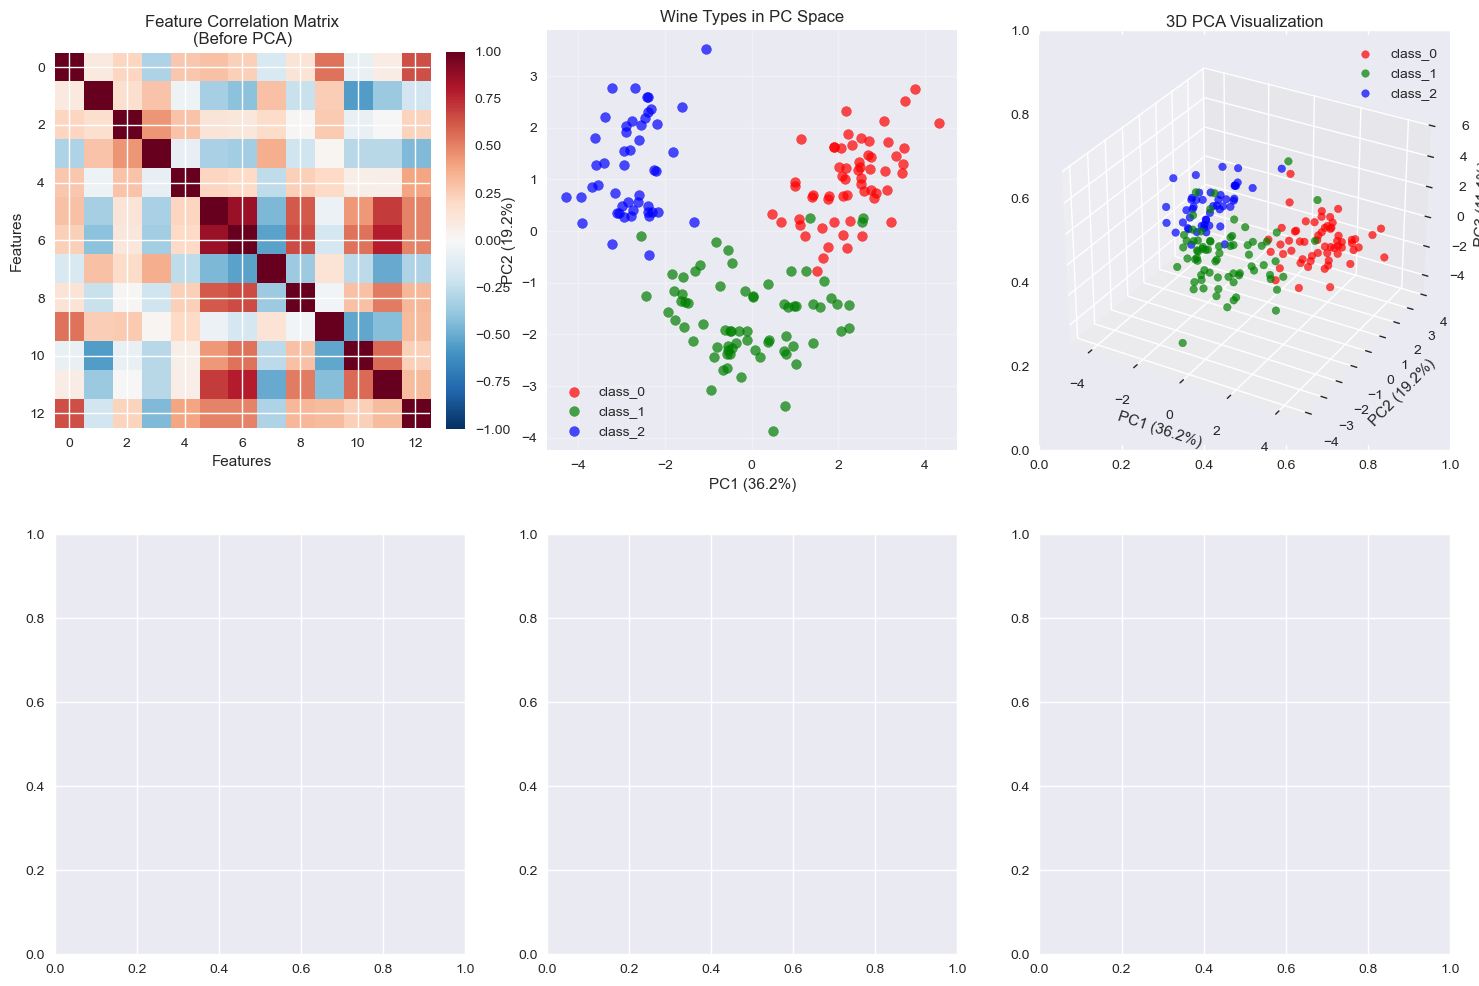

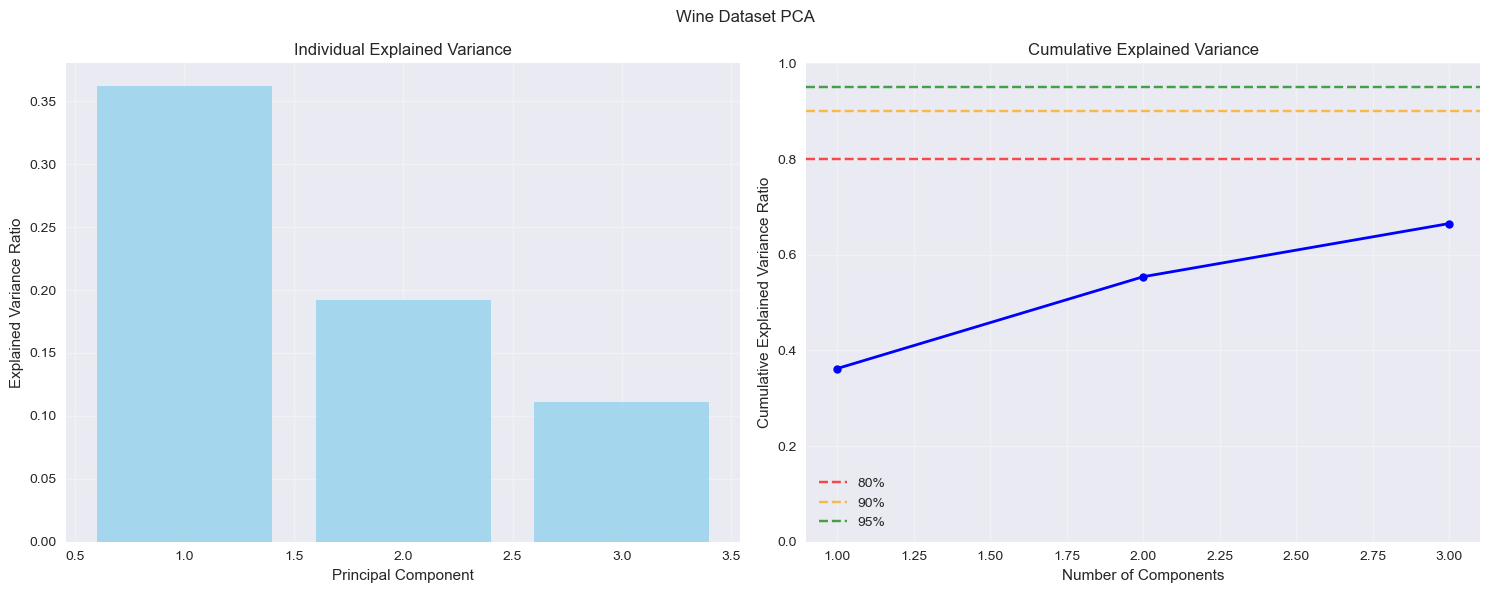

Explained Variance Summary:
  Total components: 3
  Components for 80.0% variance: 1
  Components for 90.0% variance: 1
  Components for 95.0% variance: 1


<Figure size 800x550 with 0 Axes>


Classification Performance Analysis:
Original features (13 dims): 0.989 ± 0.014
PCA features (3 dims): 0.961 ± 0.038
Dimensionality reduction: 4.3x
Variance retained: 66.5%


{'image_compression': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'wine_analysis': {'pca': PCA(n_components=3),
  'X_pca': array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
         [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
         [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
         [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01],
         [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00],
         [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01],
         [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01],
         [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01],
         [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00],
         [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01],
         [ 3.47973

In [12]:
demonstrate_pca_applications()


EXPERIMENT 6: Comparing PCA Variants and Alternatives
Created challenging dataset:
  Shape: (400, 5)
  Includes: correlation, outliers, low-variance feature

Applying Standard PCA...
Applying Incremental PCA...
Applying Kernel PCA...
Applying Sparse PCA...
Applying ICA...


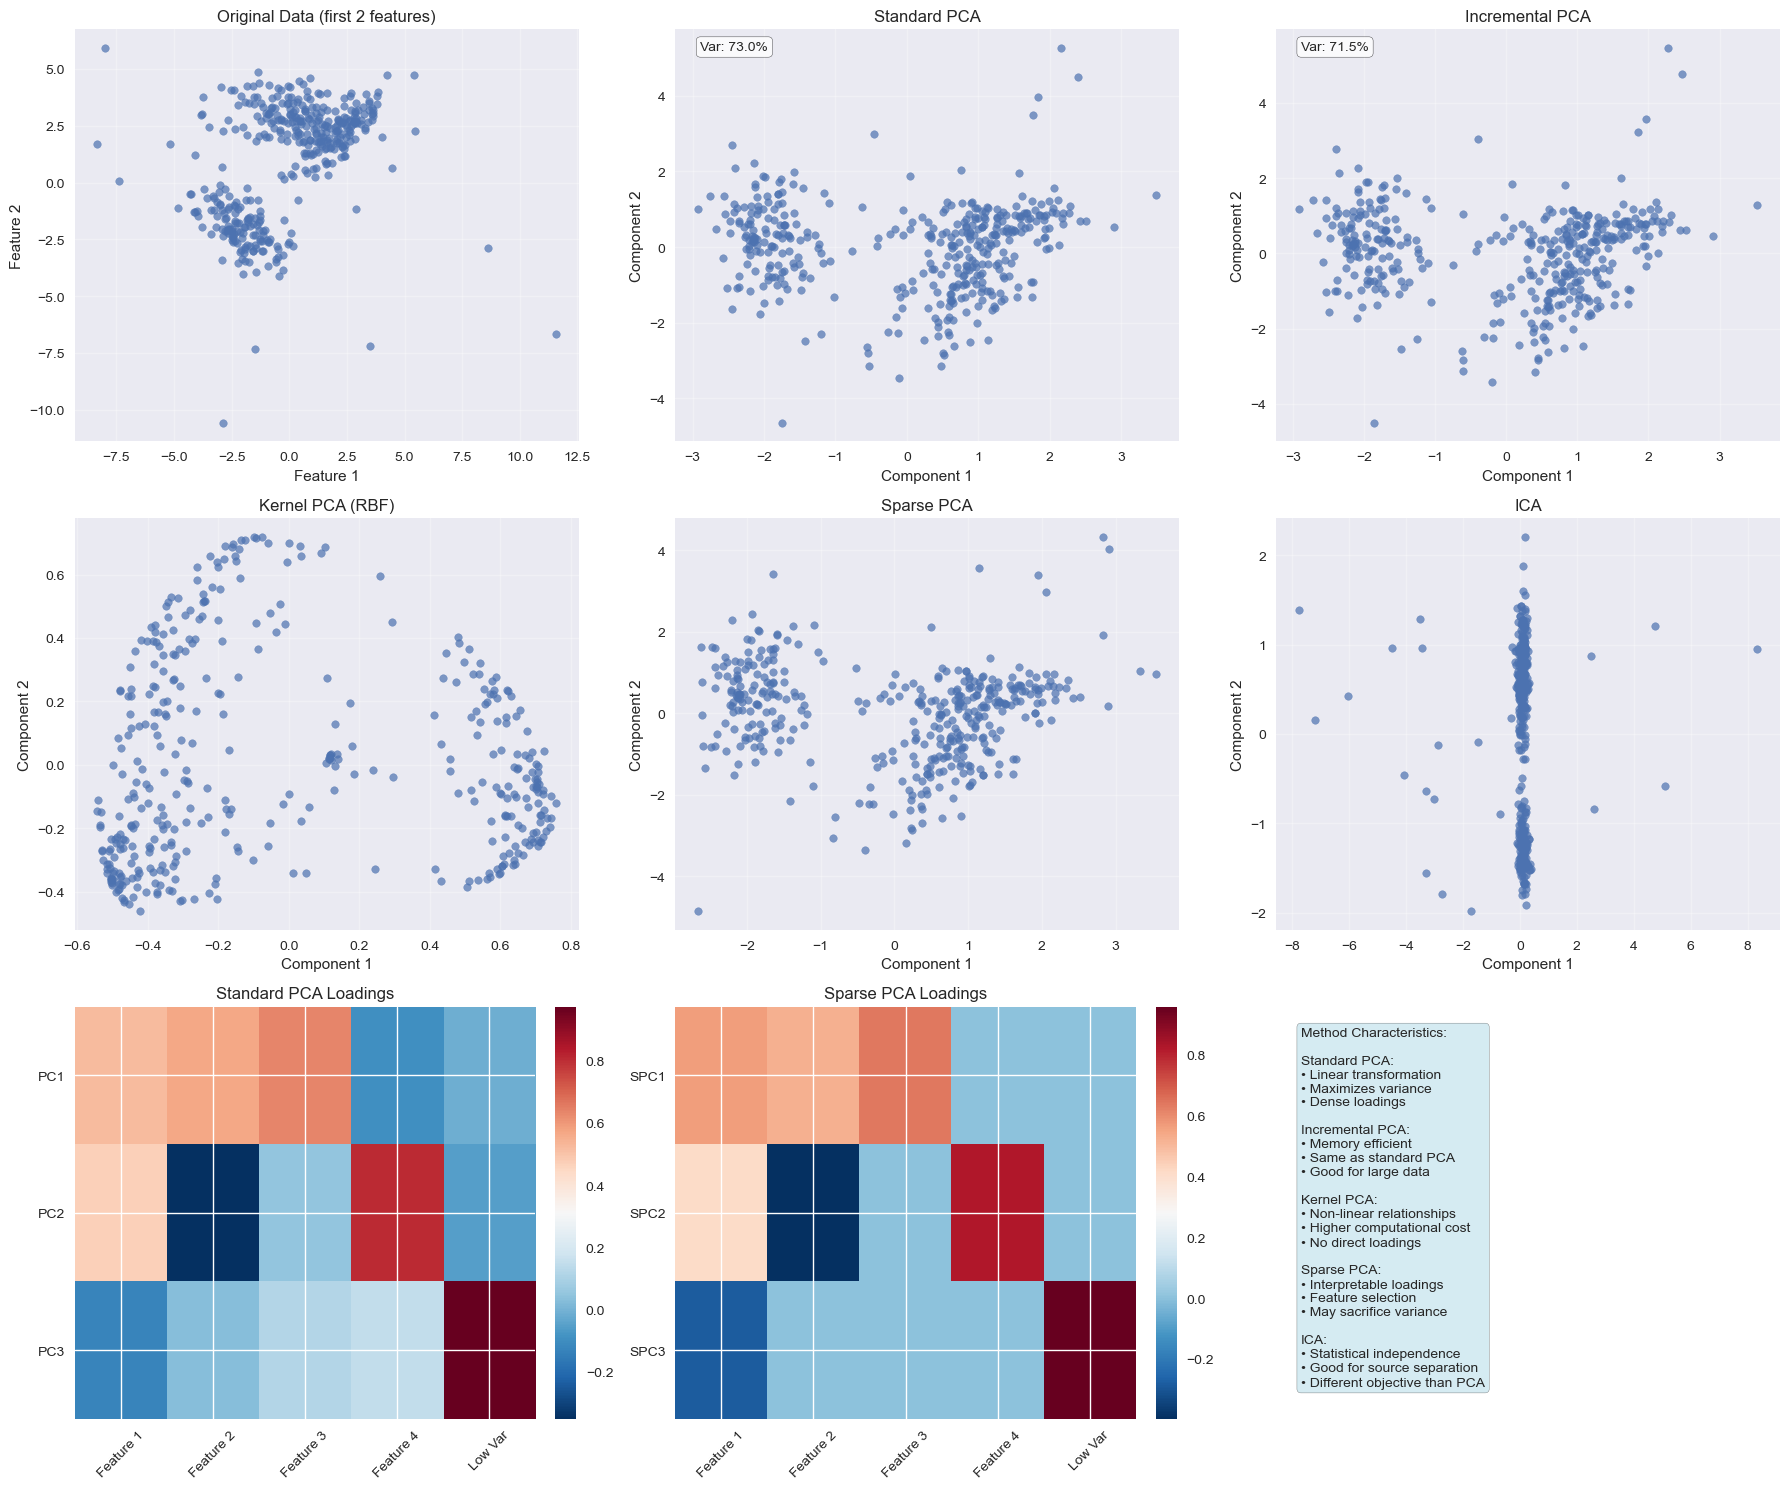


Sparsity Analysis:
Standard PCA - Non-zero loadings per component:
  PC1: 3/5 features
  PC2: 3/5 features
  PC3: 4/5 features

Sparse PCA - Non-zero loadings per component:
  SPC1: 3/5 features
  SPC2: 3/5 features
  SPC3: 2/5 features

Reconstruction Quality:
Standard PCA MSE: 0.0612
Incremental PCA MSE: 0.0620
Sparse PCA: Reconstruction not directly comparable due to sparsity
Kernel PCA: Reconstruction requires pre-image estimation


{'Standard PCA': {'transformer': PCA(n_components=3),
  'X_transformed': array([[ 0.80228641,  0.6672182 , -0.05401274],
         [ 0.63193987,  0.0421178 ,  0.02161674],
         [ 1.25632452,  0.75594135, -0.0953708 ],
         ...,
         [ 0.65023553, -1.91931855, -0.2480863 ],
         [ 1.03288583, -1.19117103, -0.16720258],
         [ 0.96982465, -0.9886472 , -0.2035208 ]]),
  'explained_variance': array([0.45455664, 0.27585557, 0.20838247])},
 'Incremental PCA': {'transformer': IncrementalPCA(batch_size=50, n_components=3),
  'X_transformed': array([[ 0.81788452,  0.64834701, -0.03545147],
         [ 0.63256512,  0.02823585,  0.02174768],
         [ 1.273991  ,  0.72638546, -0.07549834],
         ...,
         [ 0.60479607, -1.92934141, -0.31078374],
         [ 1.00378432, -1.20676581, -0.2064066 ],
         [ 0.94499729, -0.9985133 , -0.23534496]]),
  'explained_variance': array([0.45305926, 0.26182225, 0.20805781])},
 'Kernel PCA (RBF)': {'transformer': KernelPCA(gamma=0.1,

In [13]:
compare_pca_variants()


EXPERIMENT 7: Common Pitfalls and Best Practices
PITFALL 1: Inappropriate Feature Scaling
---------------------------------------------
Feature ranges:
  Age: 16.9 to 43.6
  Income ($): 17587.3 to 88527.3
  Satisfaction (1-10): 3.3 to 11.6

No Scaling:
  PC1 loadings: [ 4.48741685e-05  9.99999999e-01 -4.92874822e-06]
  Dominant feature: Income ($)

StandardScaler:
  PC1 loadings: [ 0.67226955  0.45838603 -0.58132254]
  Dominant feature: Age

MinMaxScaler:
  PC1 loadings: [-0.64292134 -0.12775867  0.75520188]
  Dominant feature: Satisfaction (1-10)


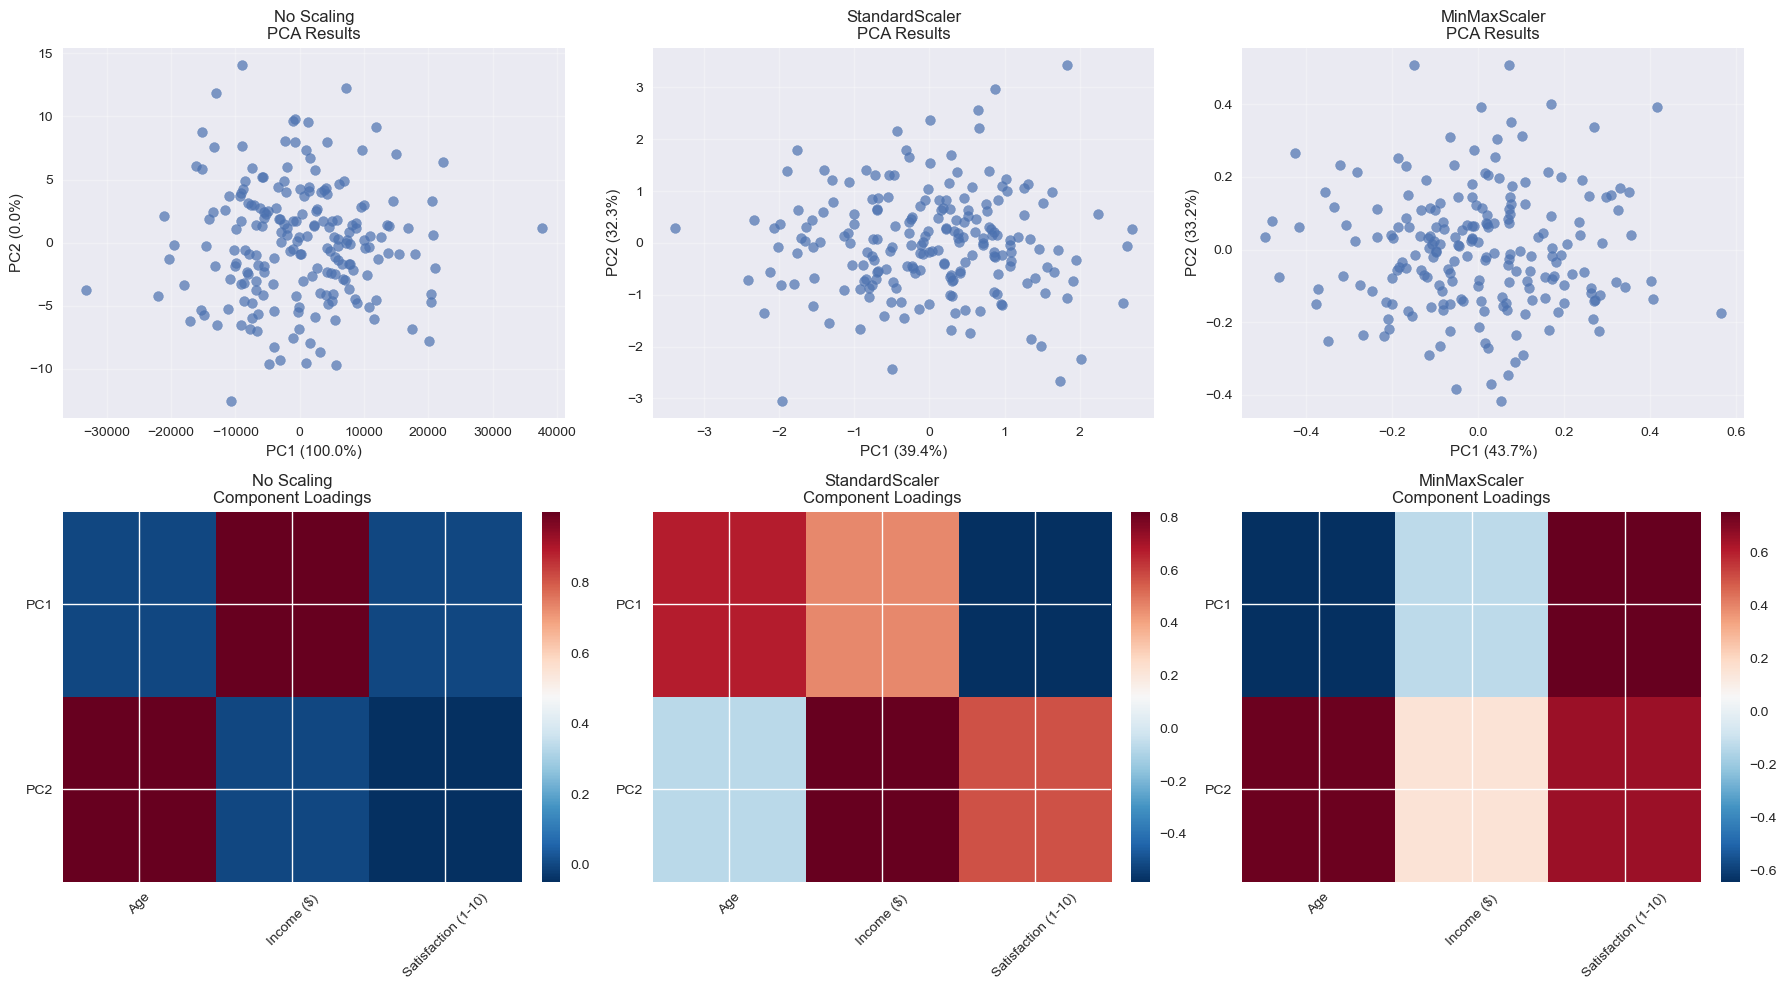


PITFALL 2: Outlier Sensitivity
-----------------------------------


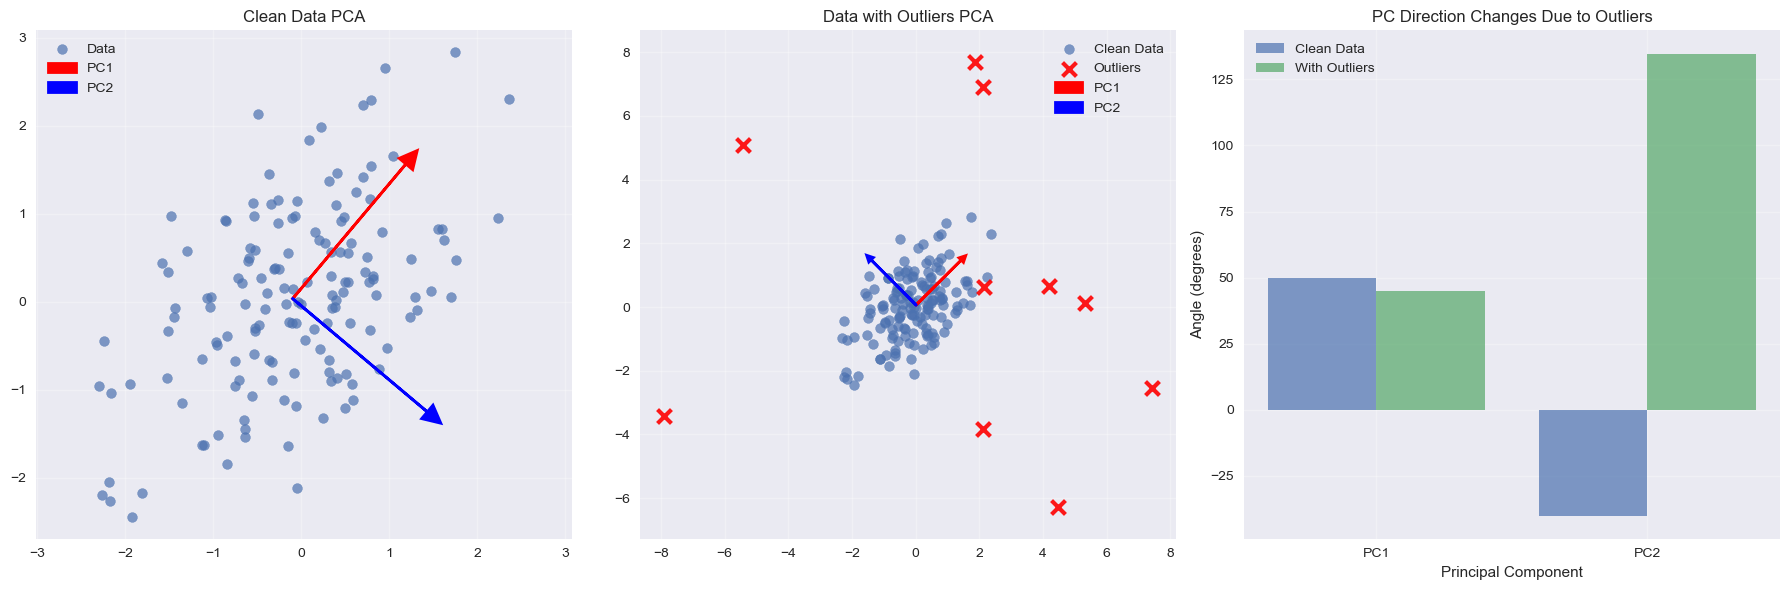

Outlier impact:
  PC1 angle change: 5.1 degrees
  PC2 angle change: 174.9 degrees
  Variance explained change: 0.178

PITFALL 3: Poor Component Selection
----------------------------------------


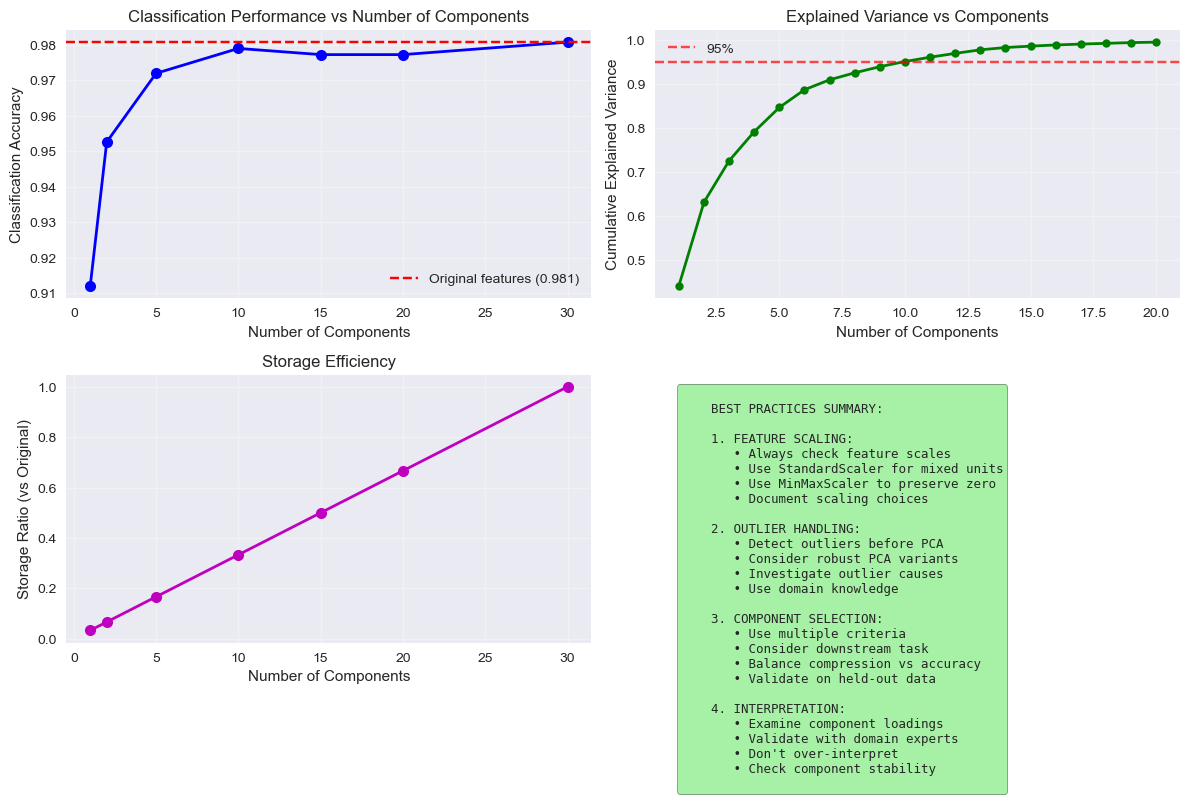


Component Selection Analysis:
  Original features: 30 dimensions, accuracy: 0.981
  Optimal PCA: 30 components, accuracy: 0.981
  Compression ratio: 1.0x
  Performance change: +0.000
  Variance explained: 100.0%


{'scaling_impact': {'No Scaling': array([[3.24835708e+01, 5.35778736e+04, 4.60835851e+00],
         [2.93086785e+01, 5.56078453e+04, 6.10093747e+00],
         [3.32384427e+01, 6.08305124e+04, 7.00786555e+00],
         [3.76151493e+01, 6.05380205e+04, 7.07047089e+00],
         [2.88292331e+01, 3.62233063e+04, 6.32490179e+00],
         [2.88293152e+01, 4.06217496e+04, 7.93427490e+00],
         [3.78960641e+01, 5.51503527e+04, 5.39856936e+00],
         [3.38371736e+01, 5.51378595e+04, 6.78643077e+00],
         [2.76526281e+01, 5.51504769e+04, 7.18044345e+00],
         [3.27128002e+01, 8.85273149e+04, 7.77165825e+00],
         [2.76829115e+01, 5.57089051e+04, 8.06742232e+00],
         [2.76713512e+01, 6.13556564e+04, 5.31303686e+00],
         [3.12098114e+01, 5.95400176e+04, 4.69882874e+00],
         [2.04335988e+01, 5.65139125e+04, 8.91651523e+00],
         [2.13754108e+01, 4.68473076e+04, 7.49847102e+00],
         [2.71885624e+01, 5.75896922e+04, 5.87727020e+00],
         [2.49358444e+01

In [14]:
pca_pitfalls_and_best_practices()